In [57]:
# notebook dependencies

# ignore all warning messages
import warnings
warnings.simplefilter("ignore")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import os # for caching purposeses
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# plotly module/library
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# importing acquire and prepapre.py files
from acquire import get_reddit_stress
import prepare
from prepare import mass_text_clean

# regular expression import
import re

# JSON import
import json

# importing BeautifulSoup for parsing HTML/XTML
from bs4 import BeautifulSoup

# request module for connecting to APIs
from requests import get

# uni-code library
import unicodedata

# natural language toolkit library/modules
import nltk
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

from pprint import pprint

In [58]:
# obtain subreddit text data 

def get_reddit_stress():
    
    # cached filename to look for
    filename = "stress.csv"

    # search for filename in local/OS directory
    if os.path.isfile(filename):

        # if file and filename exists, then return csv as Pandas df
        # future iteration: consider using relative path 
        # this may help to prevent referencing deleted/incorrect files
        df = pd.read_csv(filename, index_col = "social_timestamp")

        # print df shape
        print(f'dataframe shape: {df.shape}')

        # return the dataframe
        return df

    # if file/csv can't be found in OS directory, then access the data and cache it as a csv locally
    else:

        url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv"

        # read text data as csv and convert to pandas dataframe
        df = pd.read_csv(url)

        # let's move forward with just the following columns/features
        df = df[[
            "label", 
            "post_id",
            "subreddit",                                 
            "sentence_range",              
            "text",                        
            "id",              
            "confidence",            
            "social_timestamp",           
            "social_karma",                
            "syntax_ari",
            "sentiment",
            "social_upvote_ratio",
            "social_num_comments"
            ]]

        # timestamp appears to be in "epoch seconds format"
        df["social_timestamp"] = pd.to_datetime(df['social_timestamp'], unit = 's')

        # sort and set data as index
        df.set_index('social_timestamp', inplace = True)

        # cache the data for easier/quicker reference
        df.to_csv("stress.csv")

        # print the shape
        print(f'dataframe shape: {df.shape}')

        # return the dataframe
        return df

In [59]:
# testing out the created function 

df = get_reddit_stress()
df.head()

dataframe shape: (2838, 12)


,label,post_id,subreddit,sentence_range,text,id,confidence,social_karma,syntax_ari,sentiment,social_upvote_ratio,social_num_comments
social_timestamp,,,,,,,,,,,,
2018-03-21 06:39:13,1,8601tu,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",33181,0.8,5,1.806818,-0.002742,0.86,1
2018-05-22 17:23:37,0,8lbrx9,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,1.0,4,9.429737,0.292857,0.65,2
2018-09-03 00:46:45,1,9ch1zh,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,0.8,2,7.769821,0.011894,0.67,0
2018-01-20 06:25:55,1,7rorpp,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,0.6,0,2.667798,0.141671,0.50,5
2018-10-17 20:43:25,1,9p2gbc,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,0.8,24,7.554238,-0.204167,1.00,1


In [60]:
# df info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 2018-03-21 06:39:13 to 2017-03-07 17:58:36
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                2838 non-null   int64  
 1   post_id              2838 non-null   object 
 2   subreddit            2838 non-null   object 
 3   sentence_range       2838 non-null   object 
 4   text                 2838 non-null   object 
 5   id                   2838 non-null   int64  
 6   confidence           2838 non-null   float64
 7   social_karma         2838 non-null   int64  
 8   syntax_ari           2838 non-null   float64
 9   sentiment            2838 non-null   float64
 10  social_upvote_ratio  2838 non-null   float64
 11  social_num_comments  2838 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 288.2+ KB


In [61]:
# df shape

df.shape

(2838, 12)

In [62]:
# column names to list

df.columns.tolist()

['label',
 'post_id',
 'subreddit',
 'sentence_range',
 'text',
 'id',
 'confidence',
 'social_karma',
 'syntax_ari',
 'sentiment',
 'social_upvote_ratio',
 'social_num_comments']

In [63]:
# what is the percentage of missing values by ea. column/feature?

with pd.option_context("display.max_rows", False):
    print(df.isnull().mean()) # no features contain missing values

label                  0.0
post_id                0.0
subreddit              0.0
sentence_range         0.0
text                   0.0
id                     0.0
confidence             0.0
social_karma           0.0
syntax_ari             0.0
sentiment              0.0
social_upvote_ratio    0.0
social_num_comments    0.0
dtype: float64


In [64]:
# # let's move forward with the following columns/features

# df = df[[
#     "label", 
#     "post_id",
#     "subreddit",                                 
#     "sentence_range",              
#     "text",                        
#     "id",              
#     "confidence",            
#     "social_timestamp",           
#     "social_karma",                
#     "syntax_ari",
#     "sentiment",
#     "social_upvote_ratio",
#     "social_num_comments"
#     ]]

# df.shape 

In [65]:
# cache text data as csv for easier accessing

# df.to_csv("stress.csv")

In [66]:
# check the head

# df = pd.read_csv("stress.csv", index_col = True)

In [67]:
# let's look at the "social_timestamp" feature 
# timestamp appears to be in "epoch seconds format"

# df["social_timestamp"] = pd.to_datetime(df['social_timestamp'], unit = 's')
# df["social_timestamp"].head() # checks out!

In [68]:
# check the df info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 2018-03-21 06:39:13 to 2017-03-07 17:58:36
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                2838 non-null   int64  
 1   post_id              2838 non-null   object 
 2   subreddit            2838 non-null   object 
 3   sentence_range       2838 non-null   object 
 4   text                 2838 non-null   object 
 5   id                   2838 non-null   int64  
 6   confidence           2838 non-null   float64
 7   social_karma         2838 non-null   int64  
 8   syntax_ari           2838 non-null   float64
 9   sentiment            2838 non-null   float64
 10  social_upvote_ratio  2838 non-null   float64
 11  social_num_comments  2838 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 288.2+ KB


In [69]:
# set timestamp as index

# df = df.set_index(pd.DatetimeIndex(df['social_timestamp']))
# df.head()

In [70]:
# check the head

df.head()

,label,post_id,subreddit,sentence_range,text,id,confidence,social_karma,syntax_ari,sentiment,social_upvote_ratio,social_num_comments
social_timestamp,,,,,,,,,,,,
2018-03-21 06:39:13,1,8601tu,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",33181,0.8,5,1.806818,-0.002742,0.86,1
2018-05-22 17:23:37,0,8lbrx9,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,1.0,4,9.429737,0.292857,0.65,2
2018-09-03 00:46:45,1,9ch1zh,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,0.8,2,7.769821,0.011894,0.67,0
2018-01-20 06:25:55,1,7rorpp,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,0.6,0,2.667798,0.141671,0.50,5
2018-10-17 20:43:25,1,9p2gbc,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,0.8,24,7.554238,-0.204167,1.00,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 2018-03-21 06:39:13 to 2017-03-07 17:58:36
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   label                2838 non-null   int64  
 1   post_id              2838 non-null   object 
 2   subreddit            2838 non-null   object 
 3   sentence_range       2838 non-null   object 
 4   text                 2838 non-null   object 
 5   id                   2838 non-null   int64  
 6   confidence           2838 non-null   float64
 7   social_karma         2838 non-null   int64  
 8   syntax_ari           2838 non-null   float64
 9   sentiment            2838 non-null   float64
 10  social_upvote_ratio  2838 non-null   float64
 11  social_num_comments  2838 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 288.2+ KB


In [72]:
# data familiarization/exploration 
# let's look at ea. individual feature/column and their respective values

for col in df.columns:

    if col != "text":
        
        print(f'feature name: {col}')
        print(f'data type: {df[col].dtype}')
        print(f'number of unique values: {df[col].nunique()}')
        print(f'value samples: {df[col].sample(10).unique()}')
        print('------------------------------------------------------')

feature name: label
data type: int64
number of unique values: 2
value samples: [1 0]
------------------------------------------------------
feature name: post_id
data type: object
number of unique values: 2343
value samples: ['9gye33' '5ze577' '6ku5h0' '9ccpww' '6m45k9' '8gax80' '7ay4vy' '8pk695'
 '9le513' '96v0rr']
------------------------------------------------------
feature name: subreddit
data type: object
number of unique values: 10
value samples: ['relationships' 'assistance' 'anxiety' 'homeless' 'survivorsofabuse'
 'ptsd' 'almosthomeless']
------------------------------------------------------
feature name: sentence_range
data type: object
number of unique values: 173
value samples: ['(23, 28)' '(60, 65)' '[3, 8]' '(0, 5)' '(20, 25)' '[20, 25]' '[0, 5]'
 '[25, 30]' '(105, 110)']
------------------------------------------------------
feature name: id
data type: int64
number of unique values: 2838
value samples: [13857   822   329 12223   824 36006   104  1311  1079     8]
------

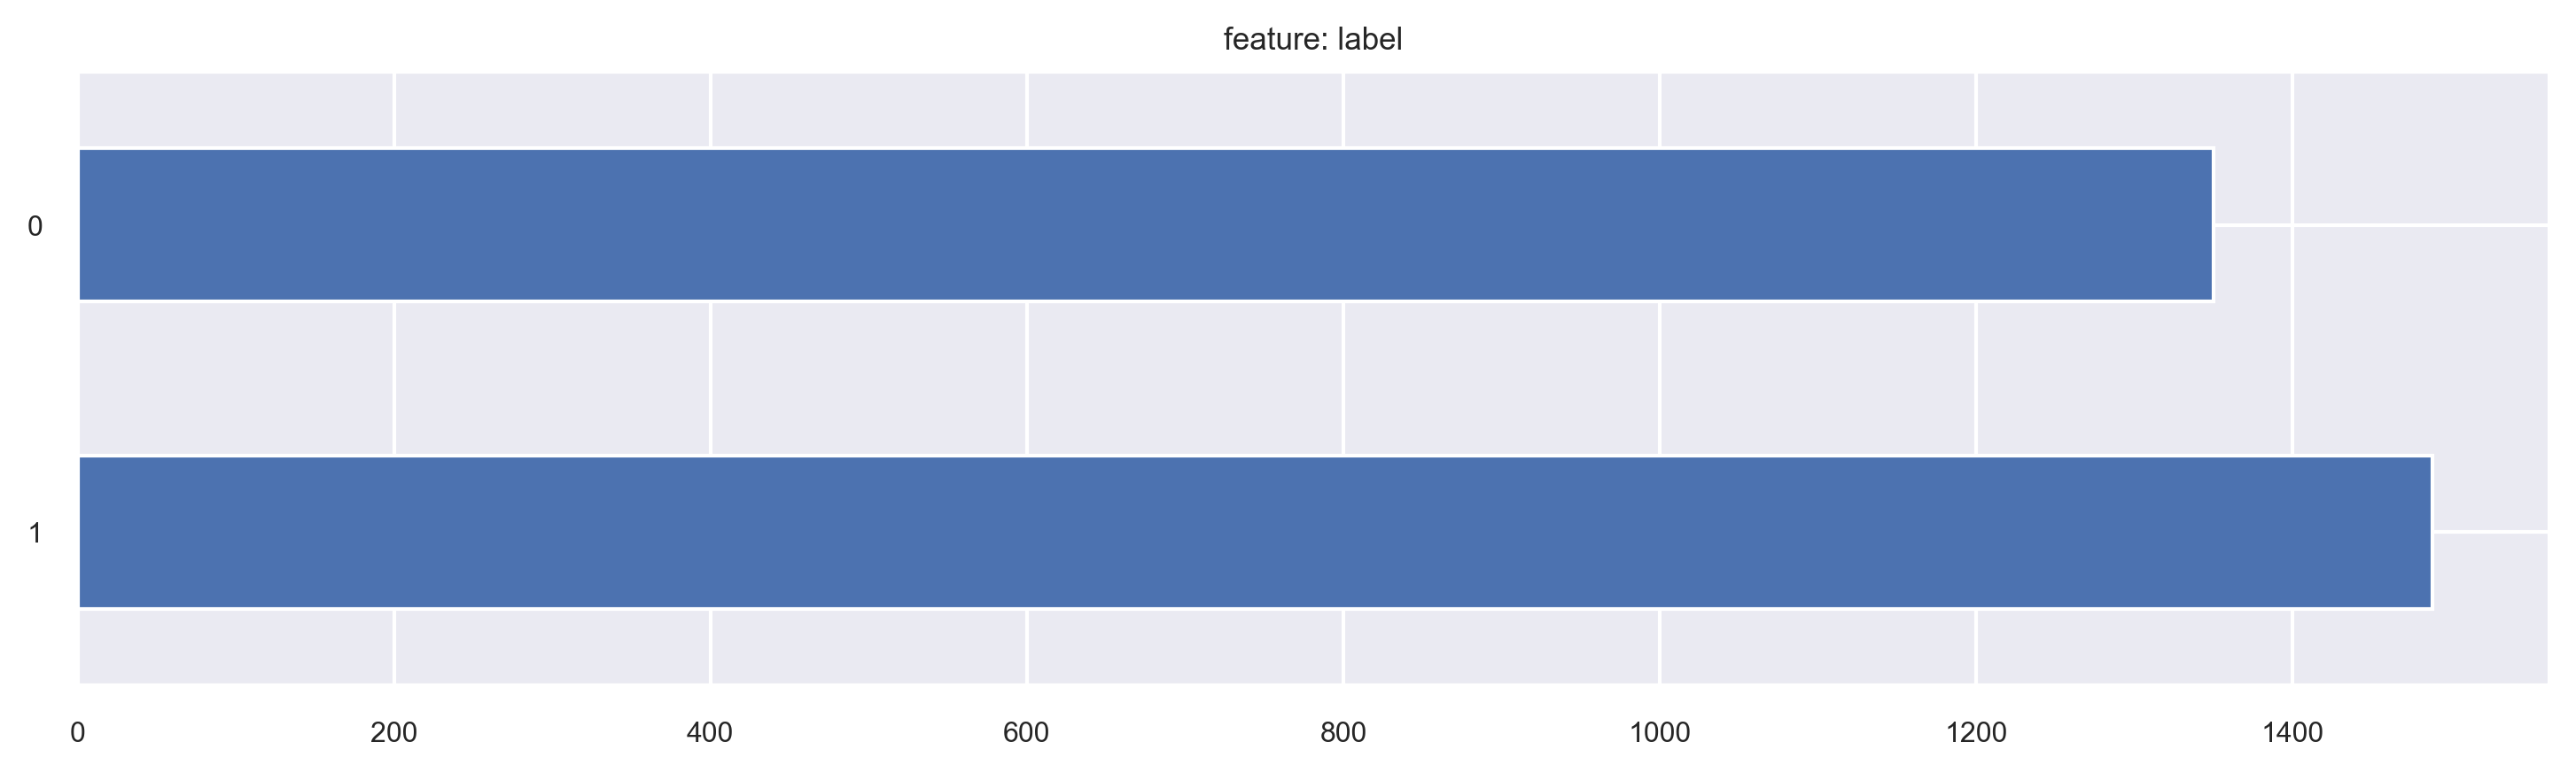

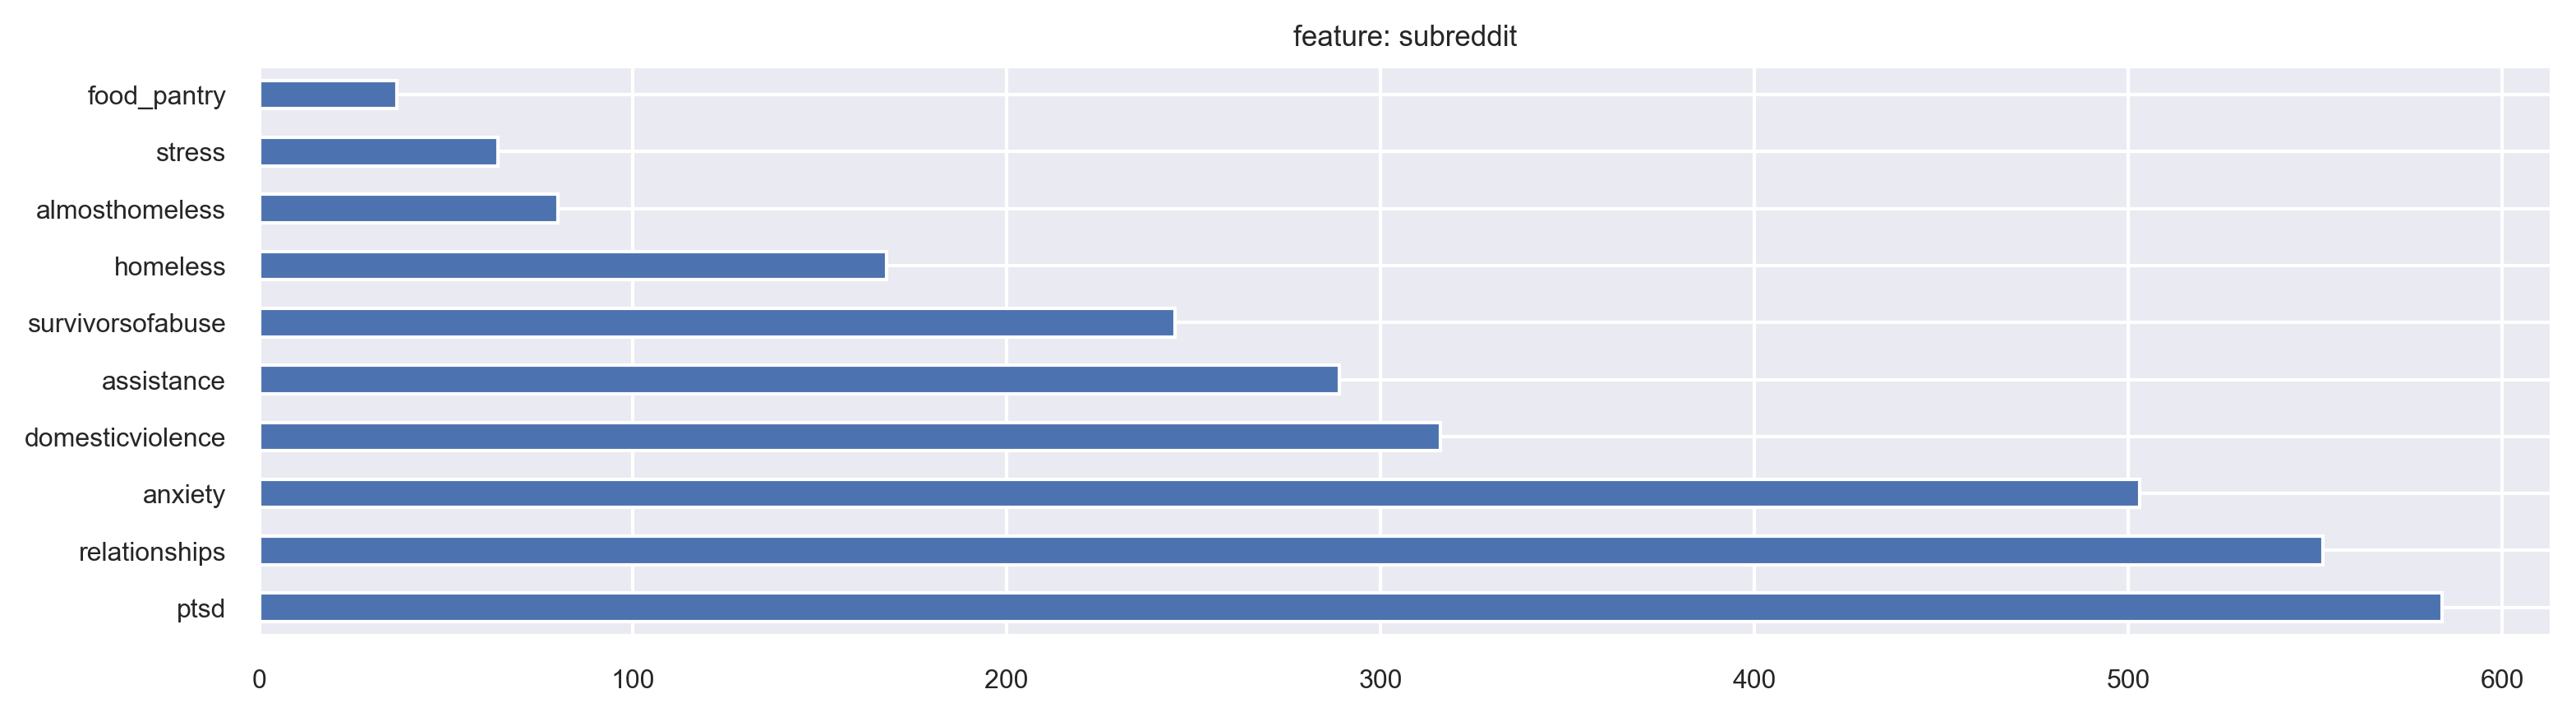

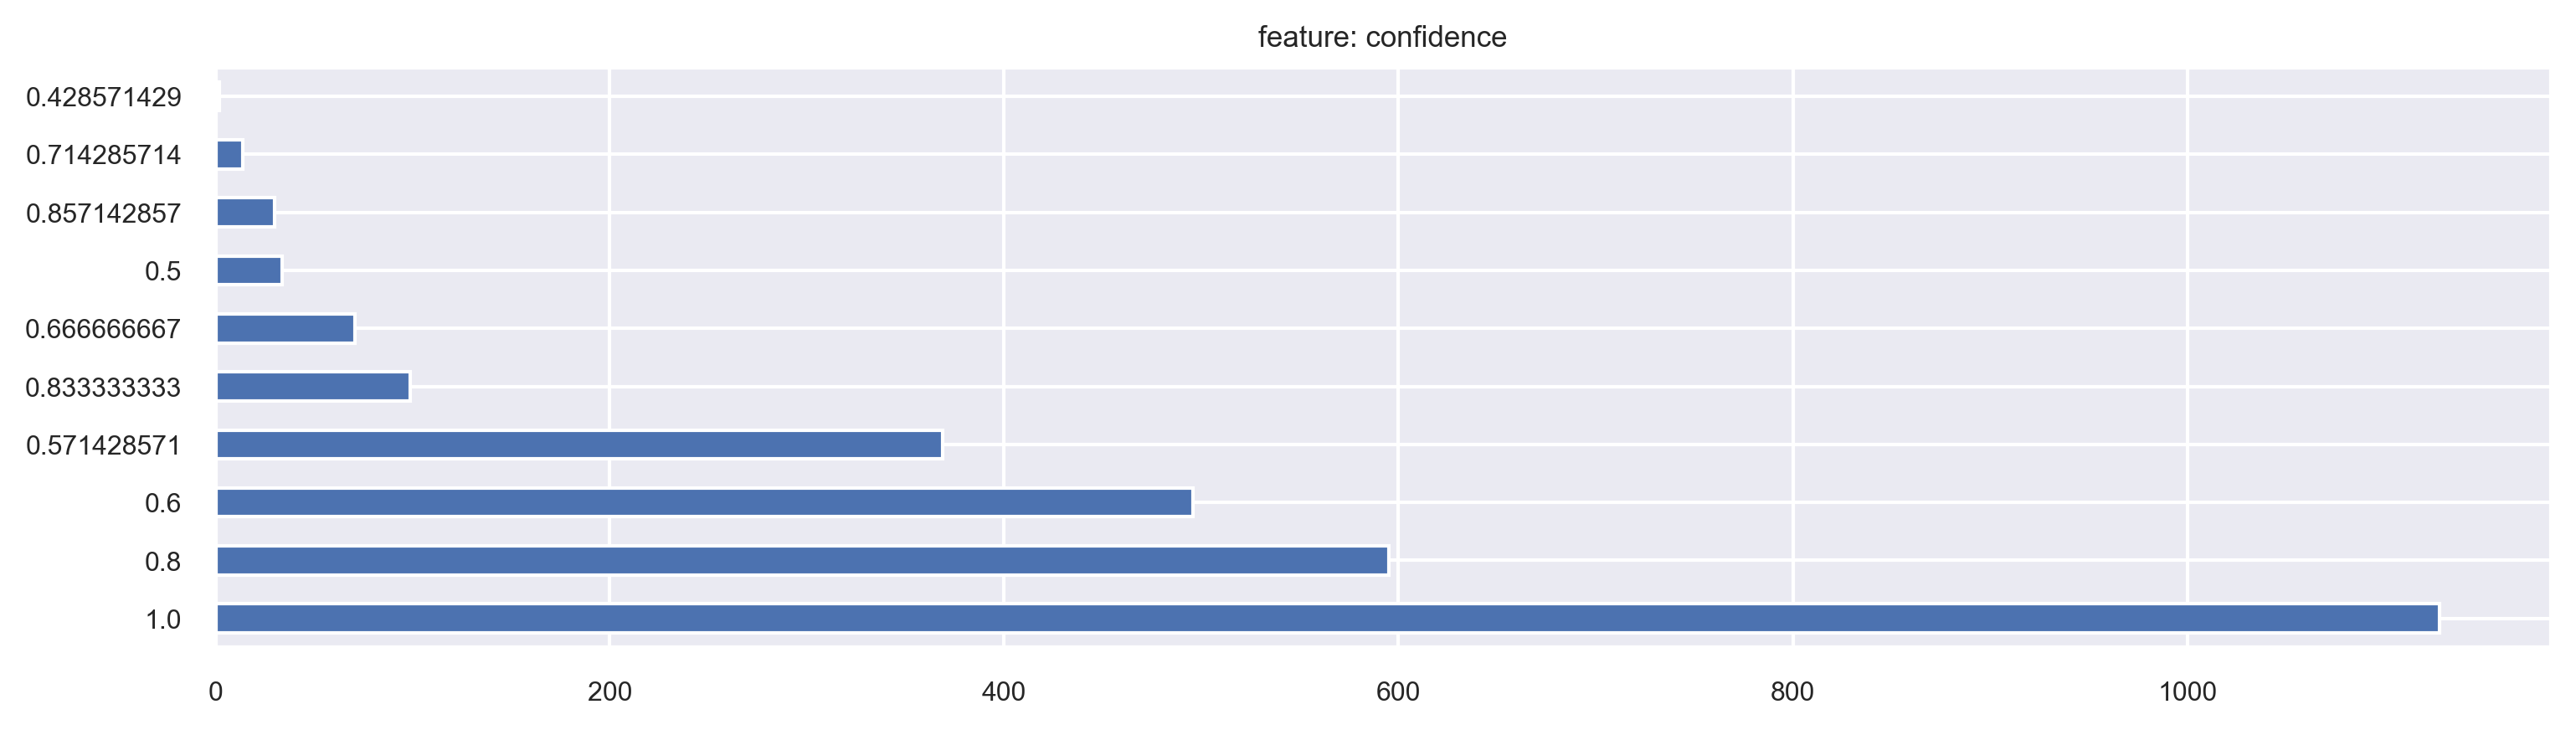

In [73]:
# let's plot a by column value counts

for col in df.columns:

    if df[col].nunique() <= 25:
        
        plt.figure(figsize = (12,3))
        sns.set(font_scale = 0.7)

        df[col].value_counts().plot(kind = "barh")

        plt.title(f'feature: {col}')
        plt.show()

### ``what about subreddit topics over time?``

In [74]:
# let's first look at the time span 
# viewing latest date first

df.index.max()

'2018-11-19 01:54:20'

In [75]:
# earliest date

df.index.min()

'2017-01-01 12:36:58'

In [76]:
# creating a month and year column 

df['month_year'] = pd.to_datetime(df.index).to_period('M')
df.head()

,label,post_id,subreddit,sentence_range,text,id,confidence,social_karma,syntax_ari,sentiment,social_upvote_ratio,social_num_comments,month_year
social_timestamp,,,,,,,,,,,,,
2018-03-21 06:39:13,1,8601tu,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",33181,0.8,5,1.806818,-0.002742,0.86,1,2018-03
2018-05-22 17:23:37,0,8lbrx9,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,1.0,4,9.429737,0.292857,0.65,2,2018-05
2018-09-03 00:46:45,1,9ch1zh,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,0.8,2,7.769821,0.011894,0.67,0,2018-09
2018-01-20 06:25:55,1,7rorpp,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,0.6,0,2.667798,0.141671,0.50,5,2018-01
2018-10-17 20:43:25,1,9p2gbc,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,0.8,24,7.554238,-0.204167,1.00,1,2018-10


In [77]:
# sort df by index timestamp

df = df.sort_index(ascending = True)
df.head()

,label,post_id,subreddit,sentence_range,text,id,confidence,social_karma,syntax_ari,sentiment,social_upvote_ratio,social_num_comments,month_year
social_timestamp,,,,,,,,,,,,,
2017-01-01 12:36:58,1,5lezhz,domesticviolence,"[14, 19]",He came after me a few times so I got away and...,313,0.571429,4,0.531035,0.076333,0.84,3,2017-01
2017-01-01 12:36:58,1,5lezhz,domesticviolence,"(5, 10)","We will get through this and I am determined, ...",31536,0.857143,4,8.679730,0.047222,0.84,3,2017-01
2017-01-01 18:35:06,1,5lge1y,anxiety,"(0, 5)",Currently in s constant state of anxiety with ...,7419,1.000000,14,7.822923,-0.083333,0.94,8,2017-01
2017-01-03 16:10:28,1,5lspep,survivorsofabuse,"(5, 10)",I was having a fucking panic attack.Once we pa...,18404,1.000000,5,0.633660,-0.466667,0.86,7,2017-01
2017-01-03 22:13:10,1,5luwz3,almosthomeless,"[10, 15]",I am afraid that she will sell the house becau...,1804,0.800000,5,2.823077,-0.401250,0.65,15,2017-01


In [78]:
# renaming several subreddit titles for clarification

df["subreddit"].replace({
    'almosthomeless': "almost_homeless",
    'domesticviolence': "domestic_violence",
    'survivorsofabuse': 'abuse_survivors'},
    inplace = True)

df["subreddit"].unique()

array(['domestic_violence', 'anxiety', 'abuse_survivors',
       'almost_homeless', 'homeless', 'ptsd', 'stress', 'assistance',
       'food_pantry', 'relationships'], dtype=object)

In [79]:
# plotting subreddit topics over time

test_df = pd.get_dummies(df["subreddit"])
test_df.index = pd.to_datetime(test_df.index)
test_df.head()

,abuse_survivors,almost_homeless,anxiety,assistance,domestic_violence,food_pantry,homeless,ptsd,relationships,stress
social_timestamp,,,,,,,,,,
2017-01-01 12:36:58,0,0,0,0,1,0,0,0,0,0
2017-01-01 12:36:58,0,0,0,0,1,0,0,0,0,0
2017-01-01 18:35:06,0,0,1,0,0,0,0,0,0,0
2017-01-03 16:10:28,1,0,0,0,0,0,0,0,0,0
2017-01-03 22:13:10,0,1,0,0,0,0,0,0,0,0


In [80]:
# create a list of subreddit column/feature names

test_cols = test_df.columns.tolist()
test_cols

['abuse_survivors',
 'almost_homeless',
 'anxiety',
 'assistance',
 'domestic_violence',
 'food_pantry',
 'homeless',
 'ptsd',
 'relationships',
 'stress']

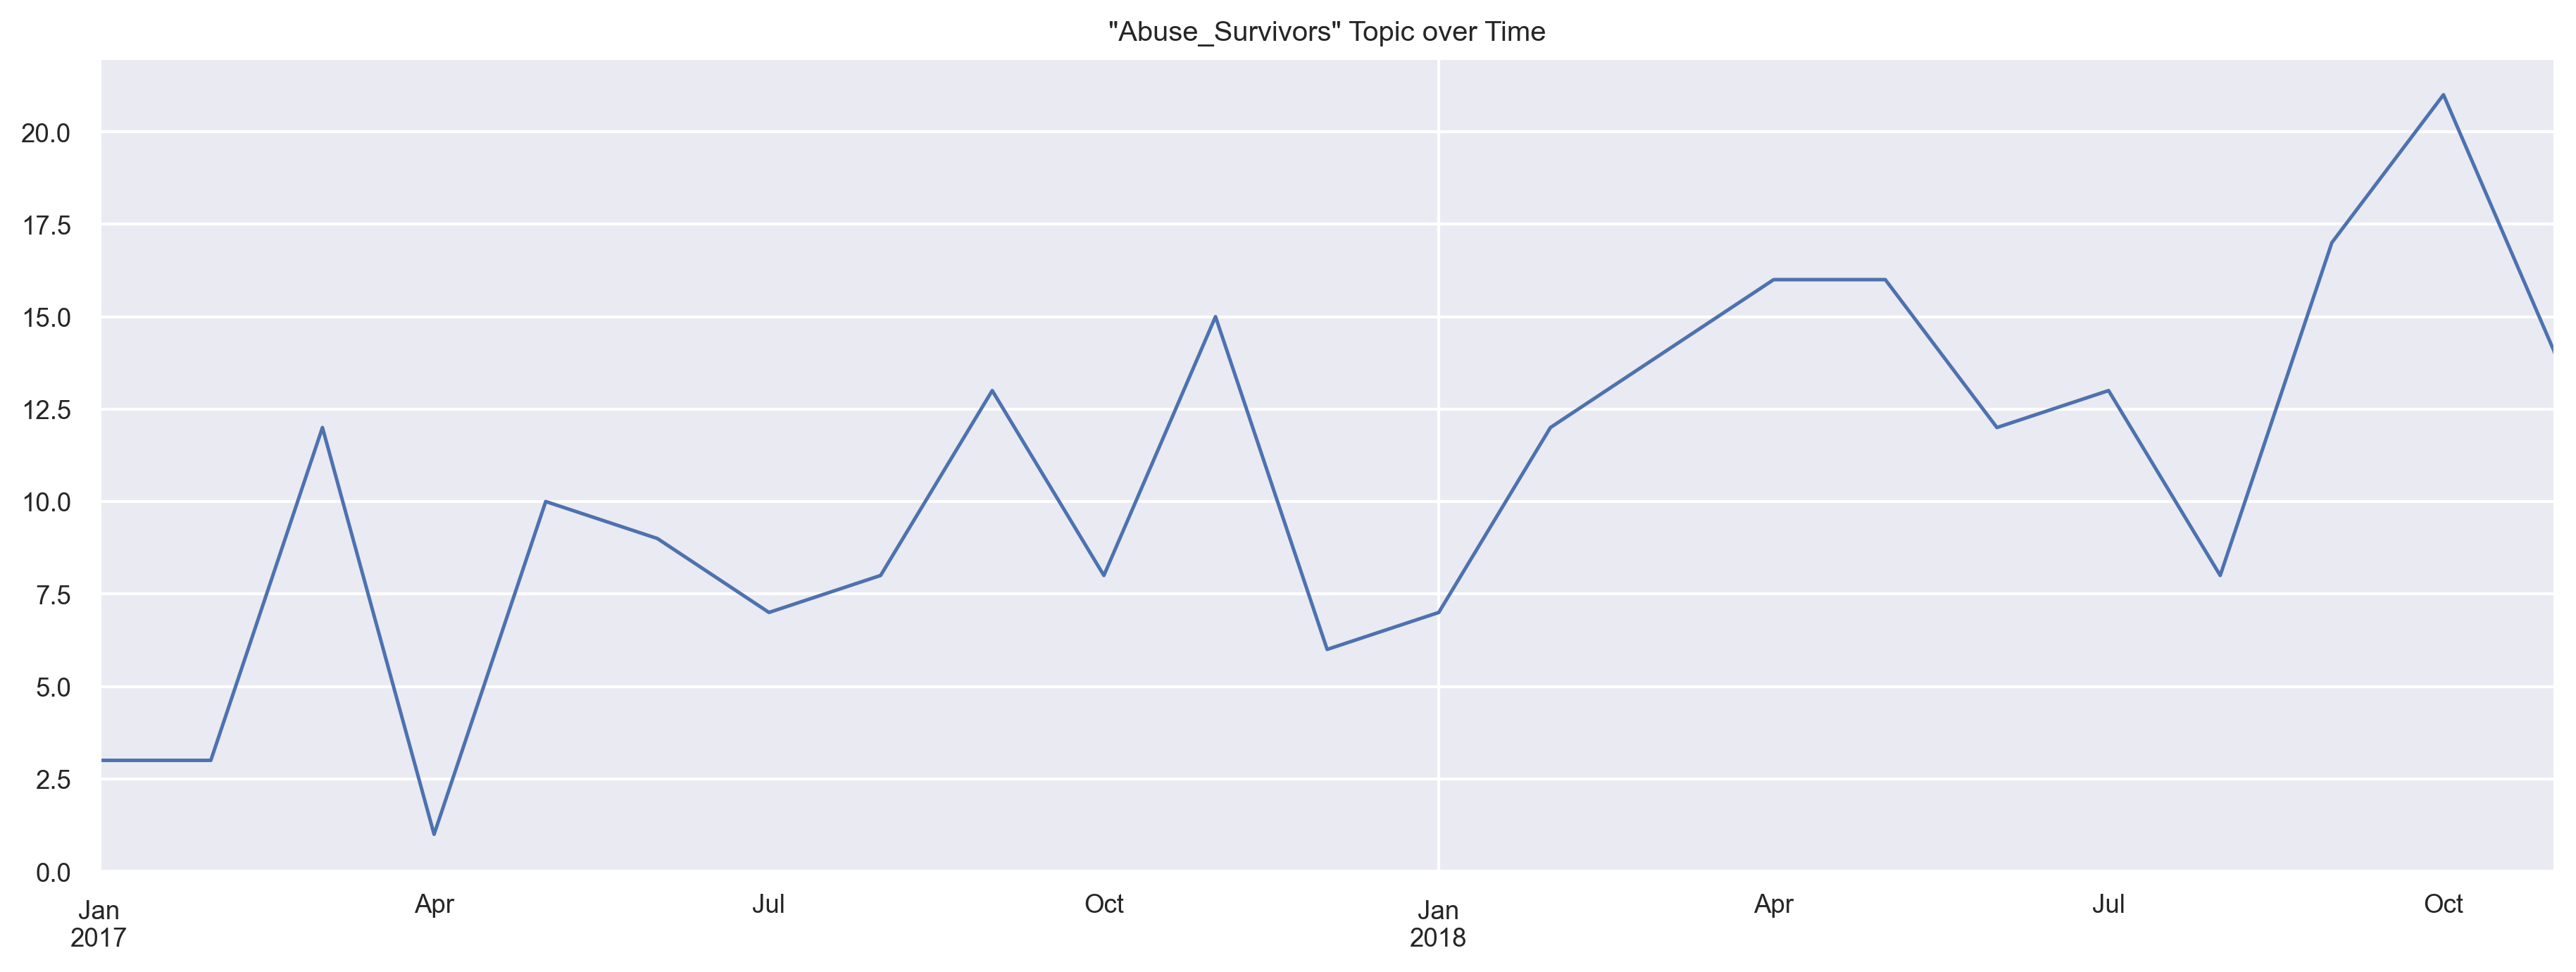

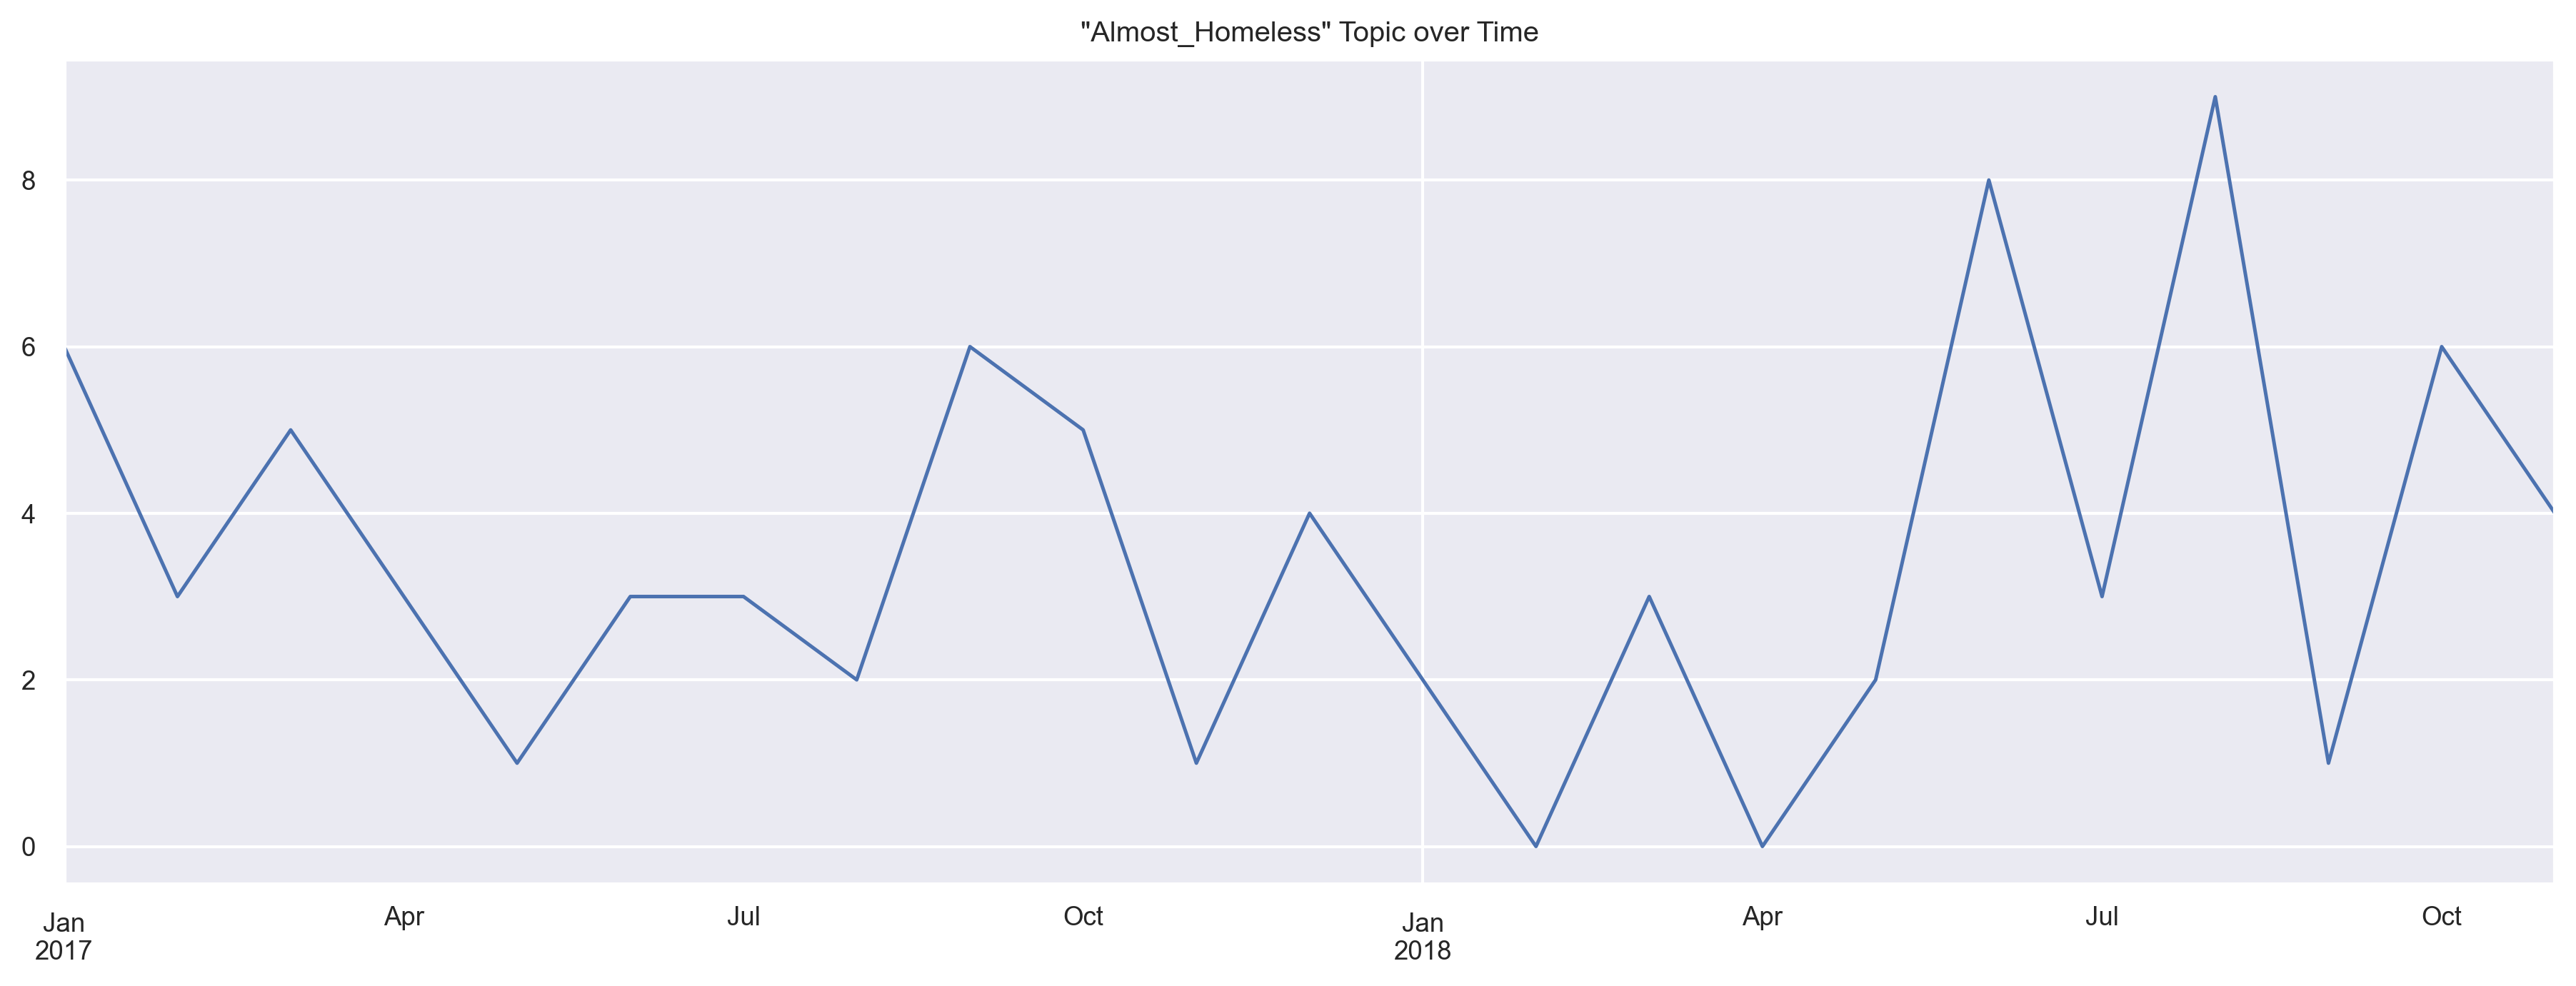

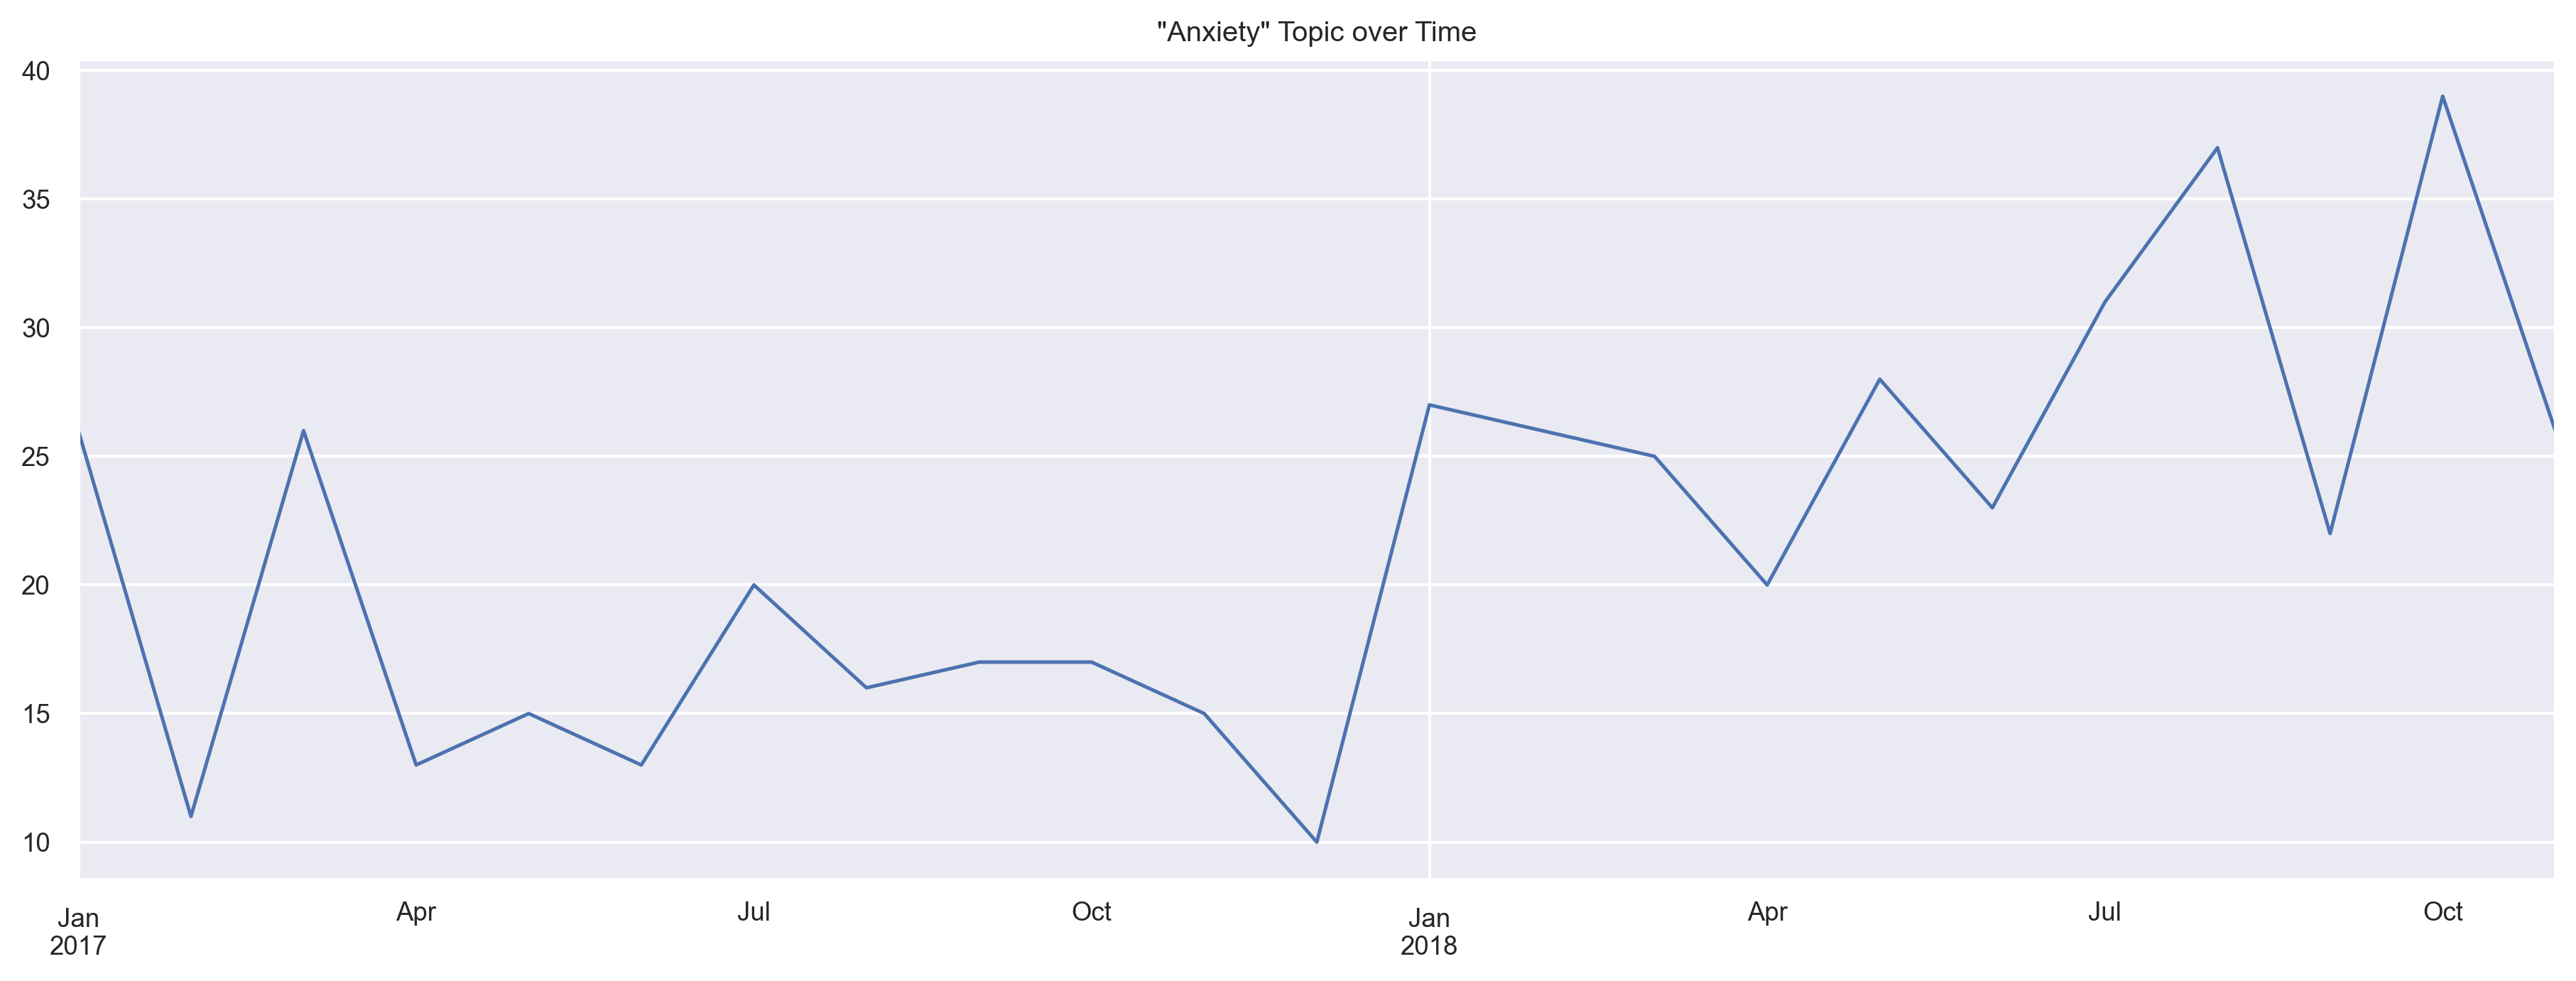

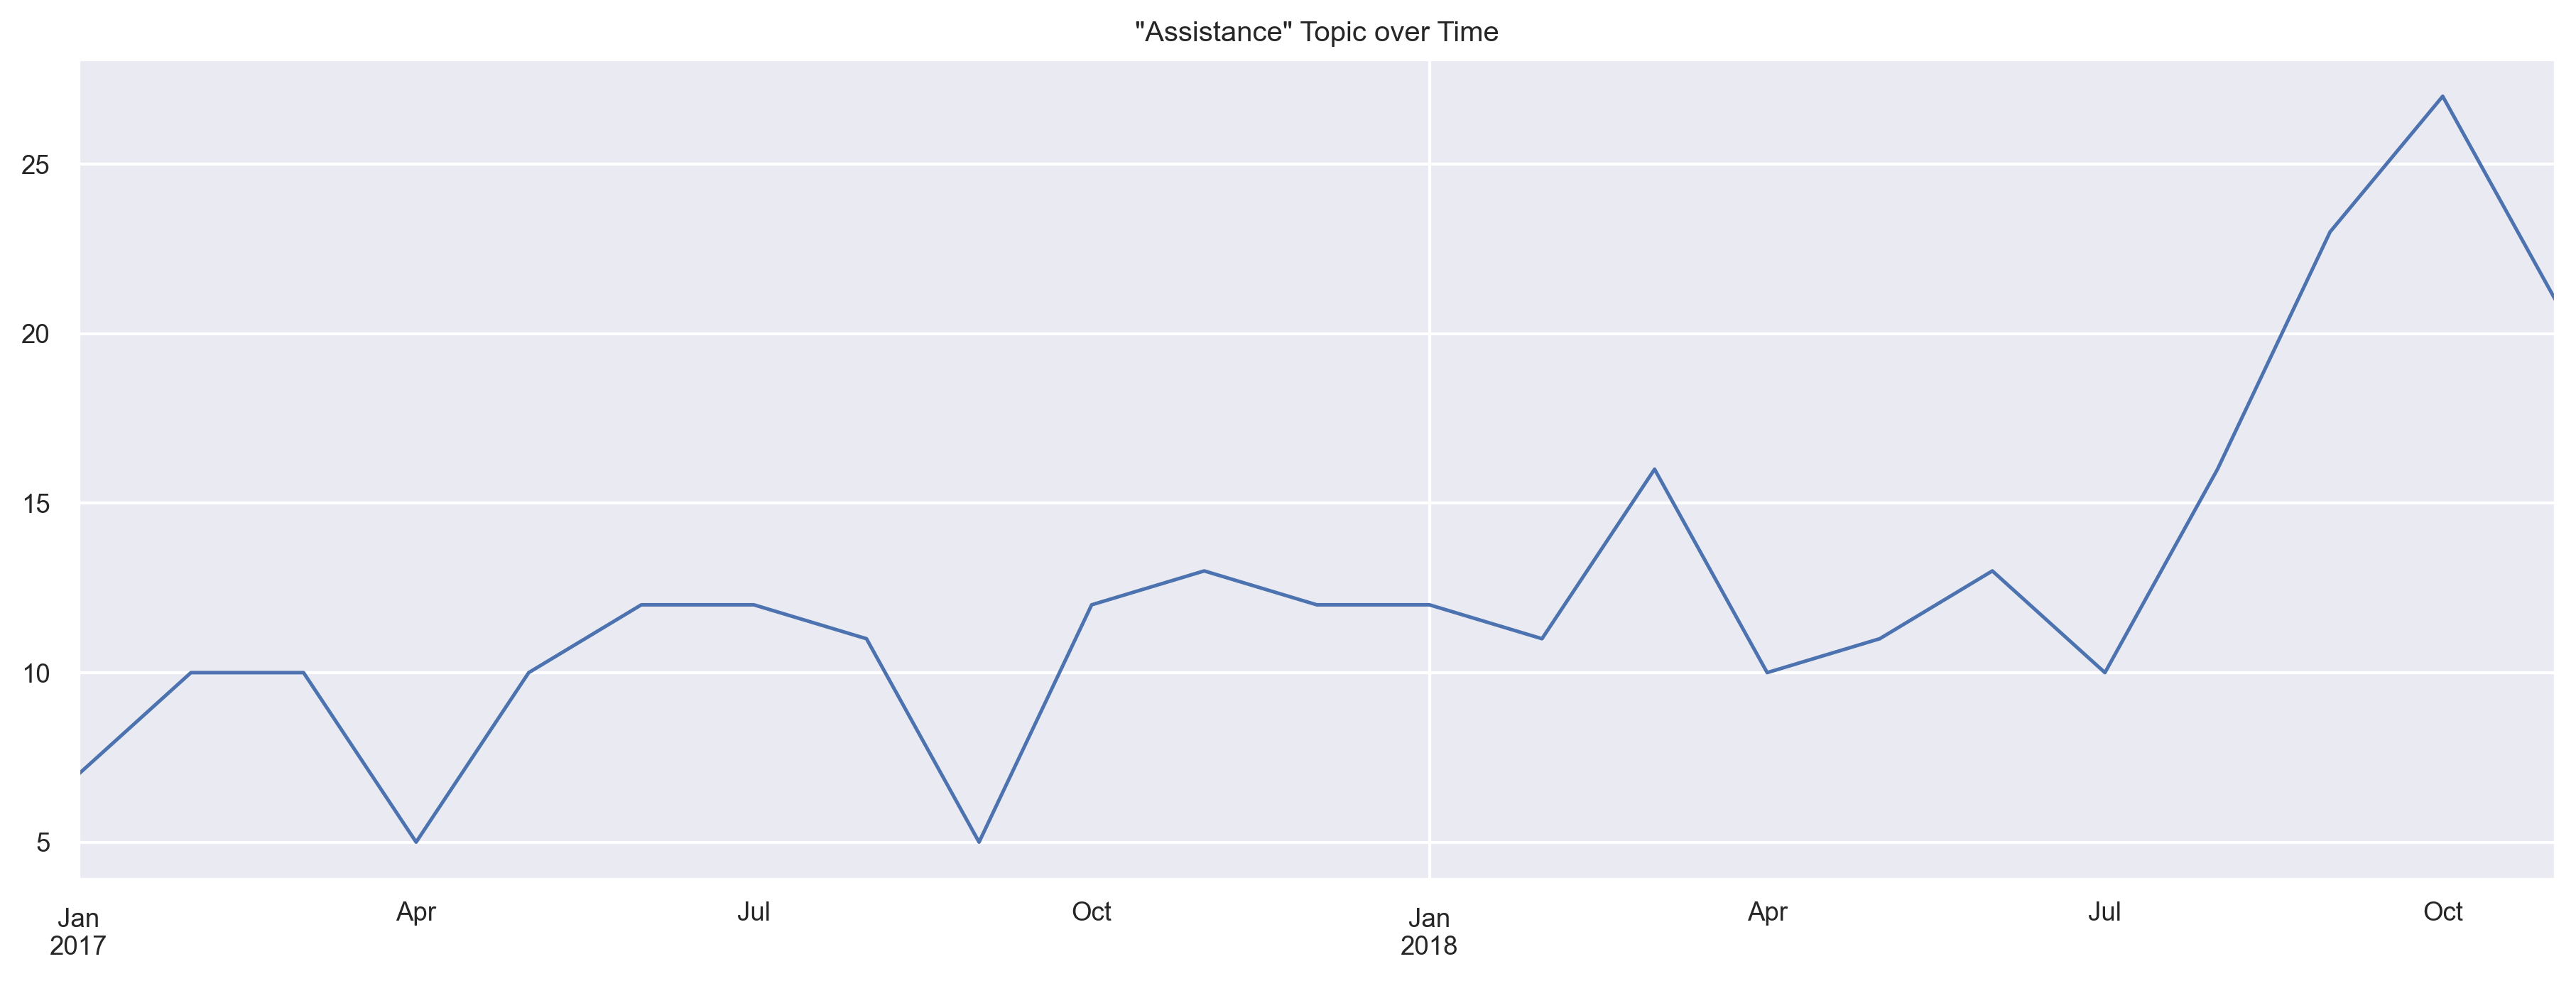

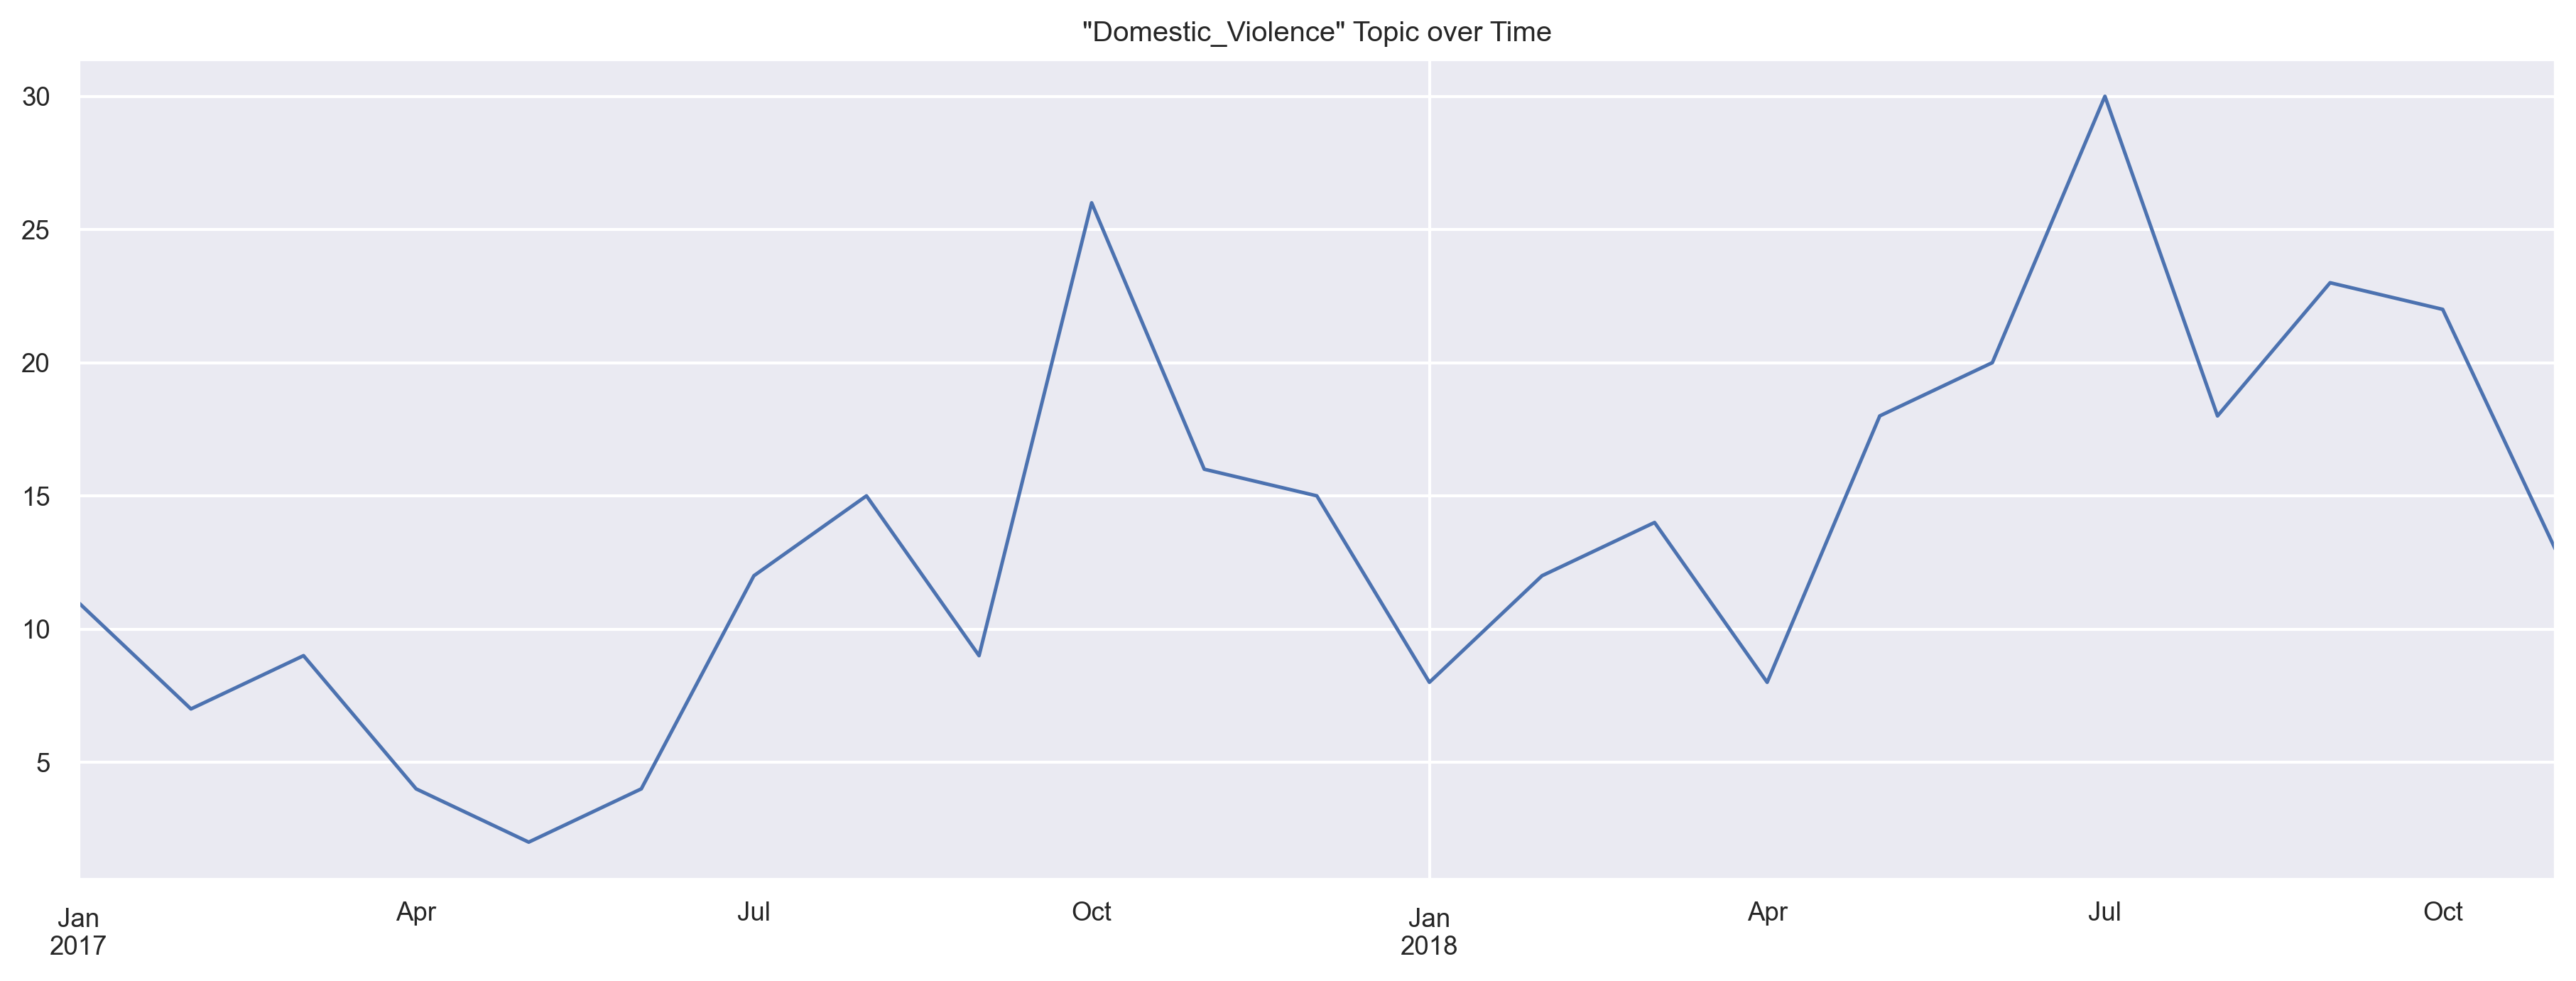

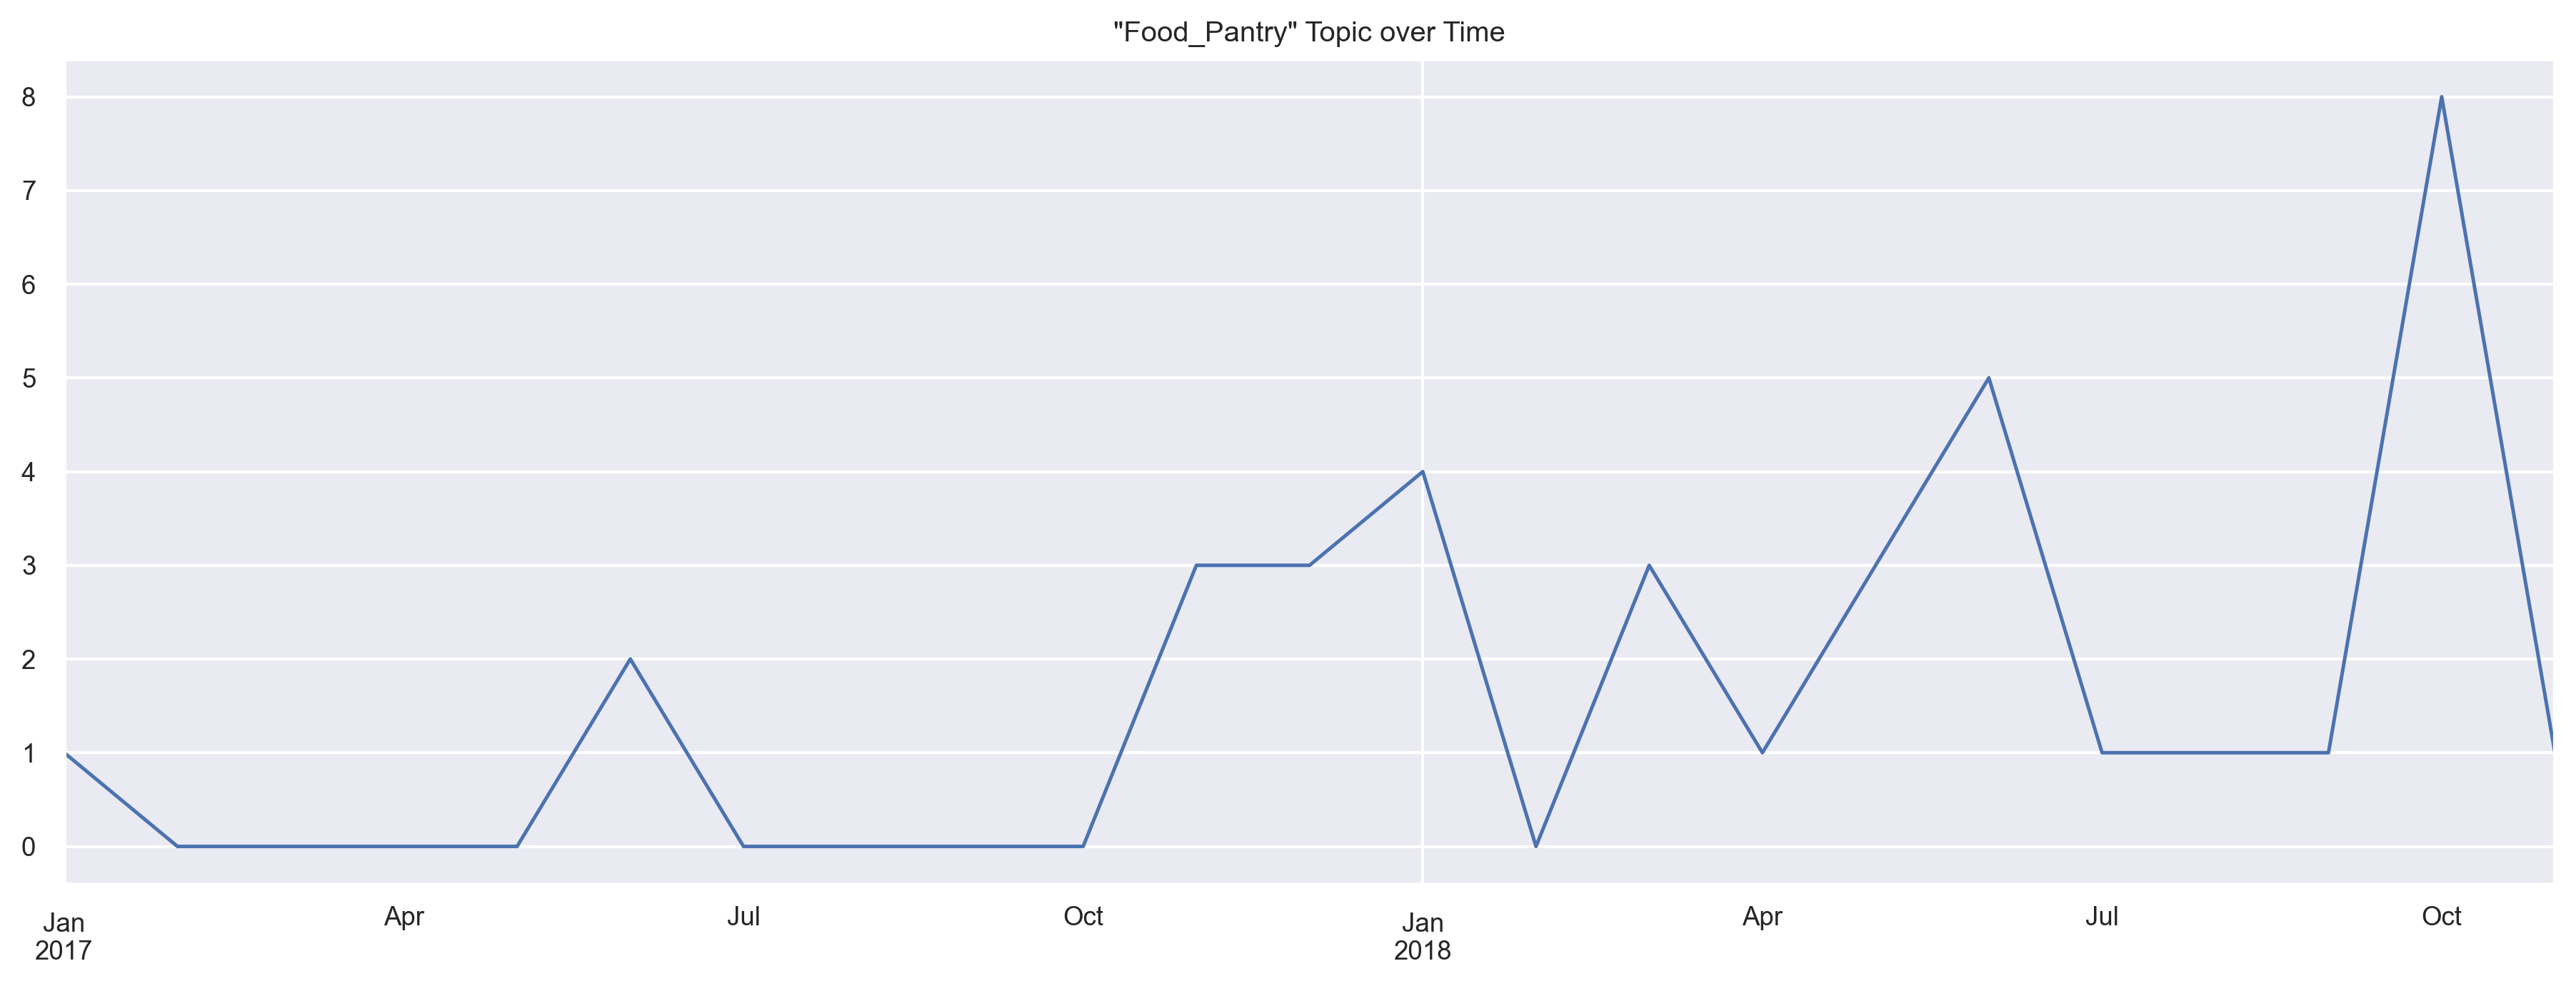

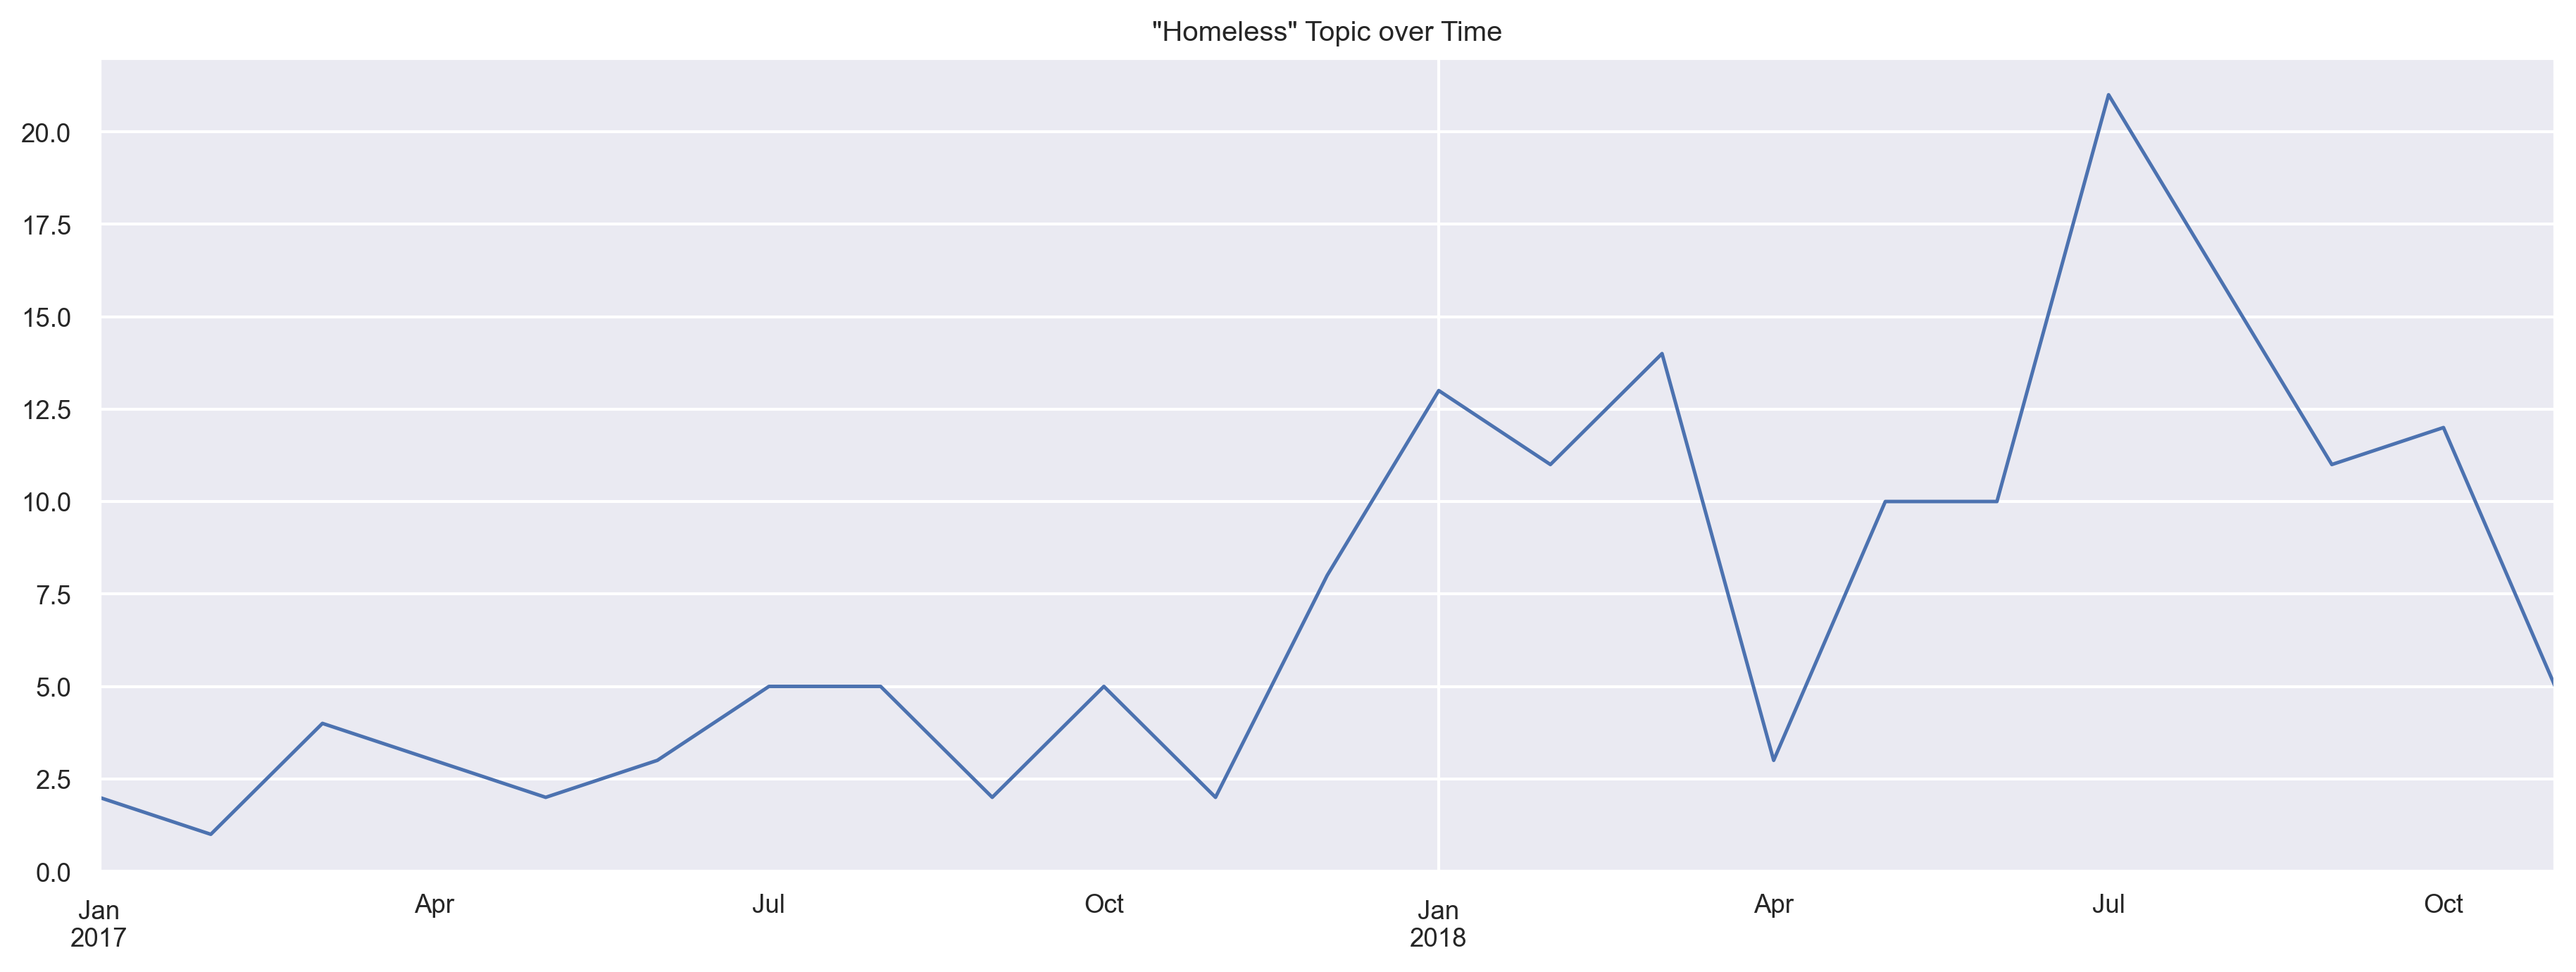

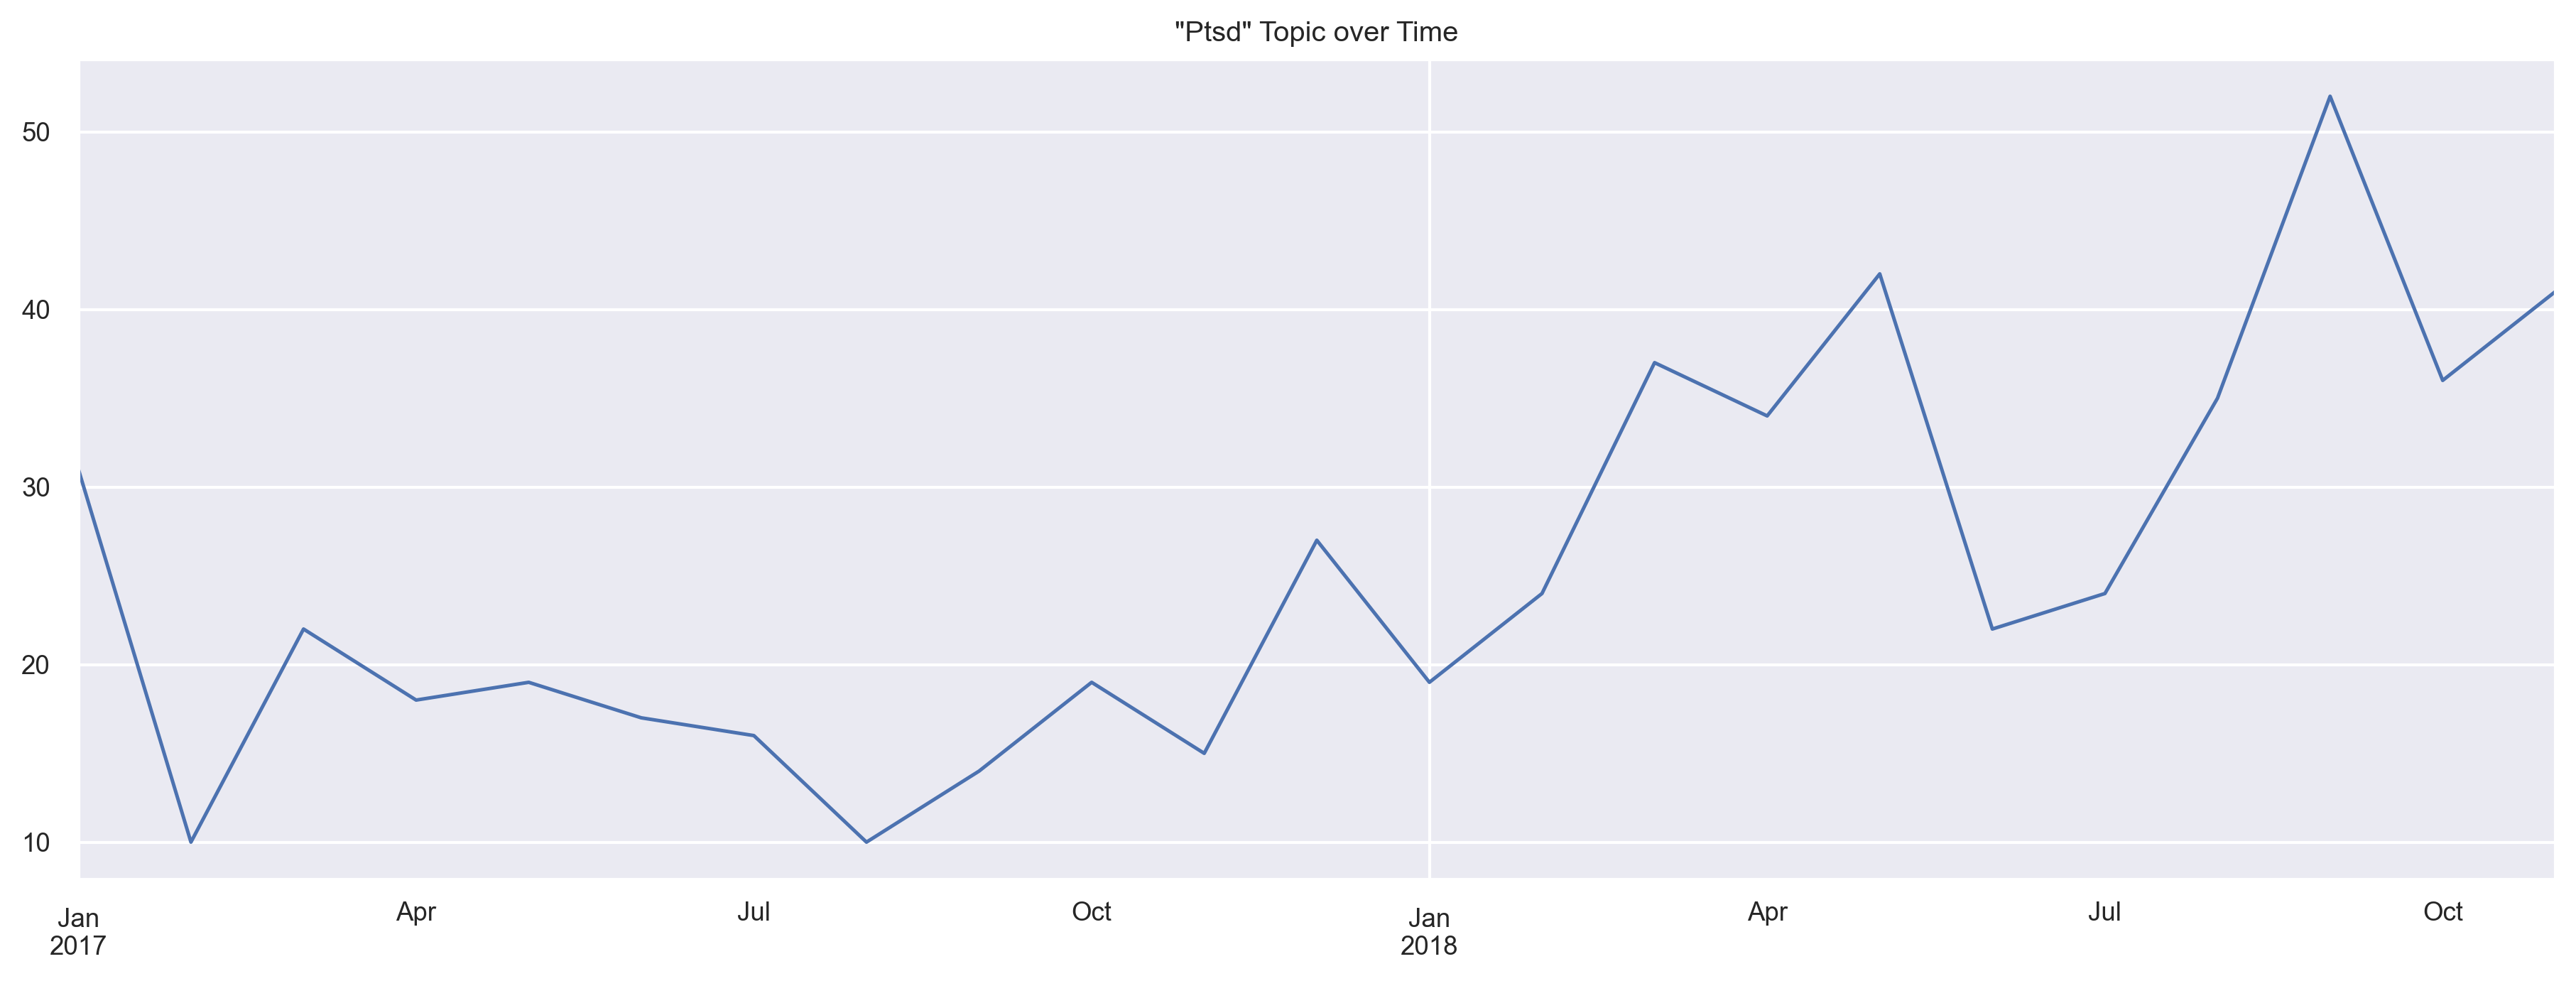

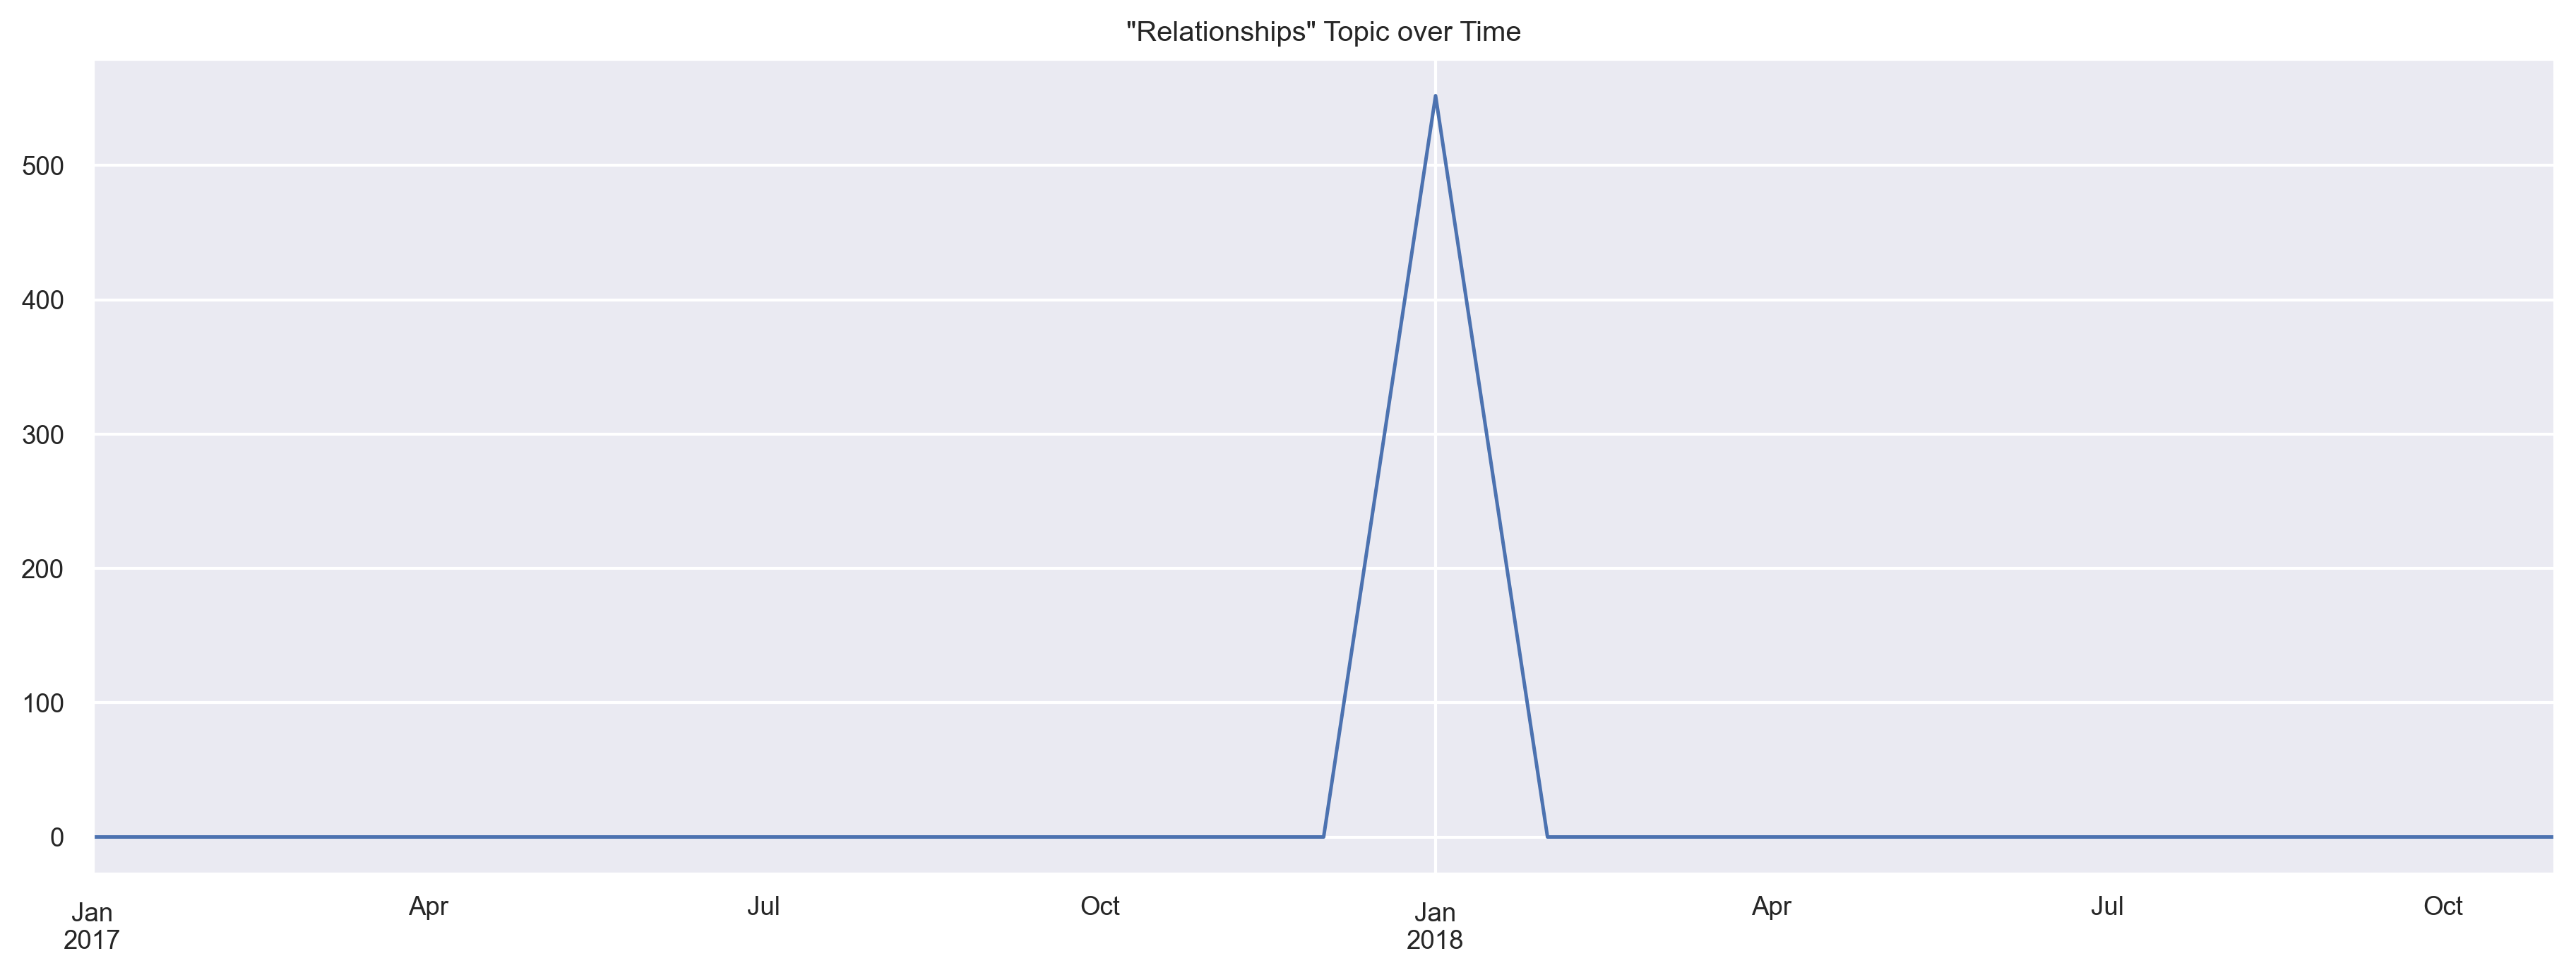

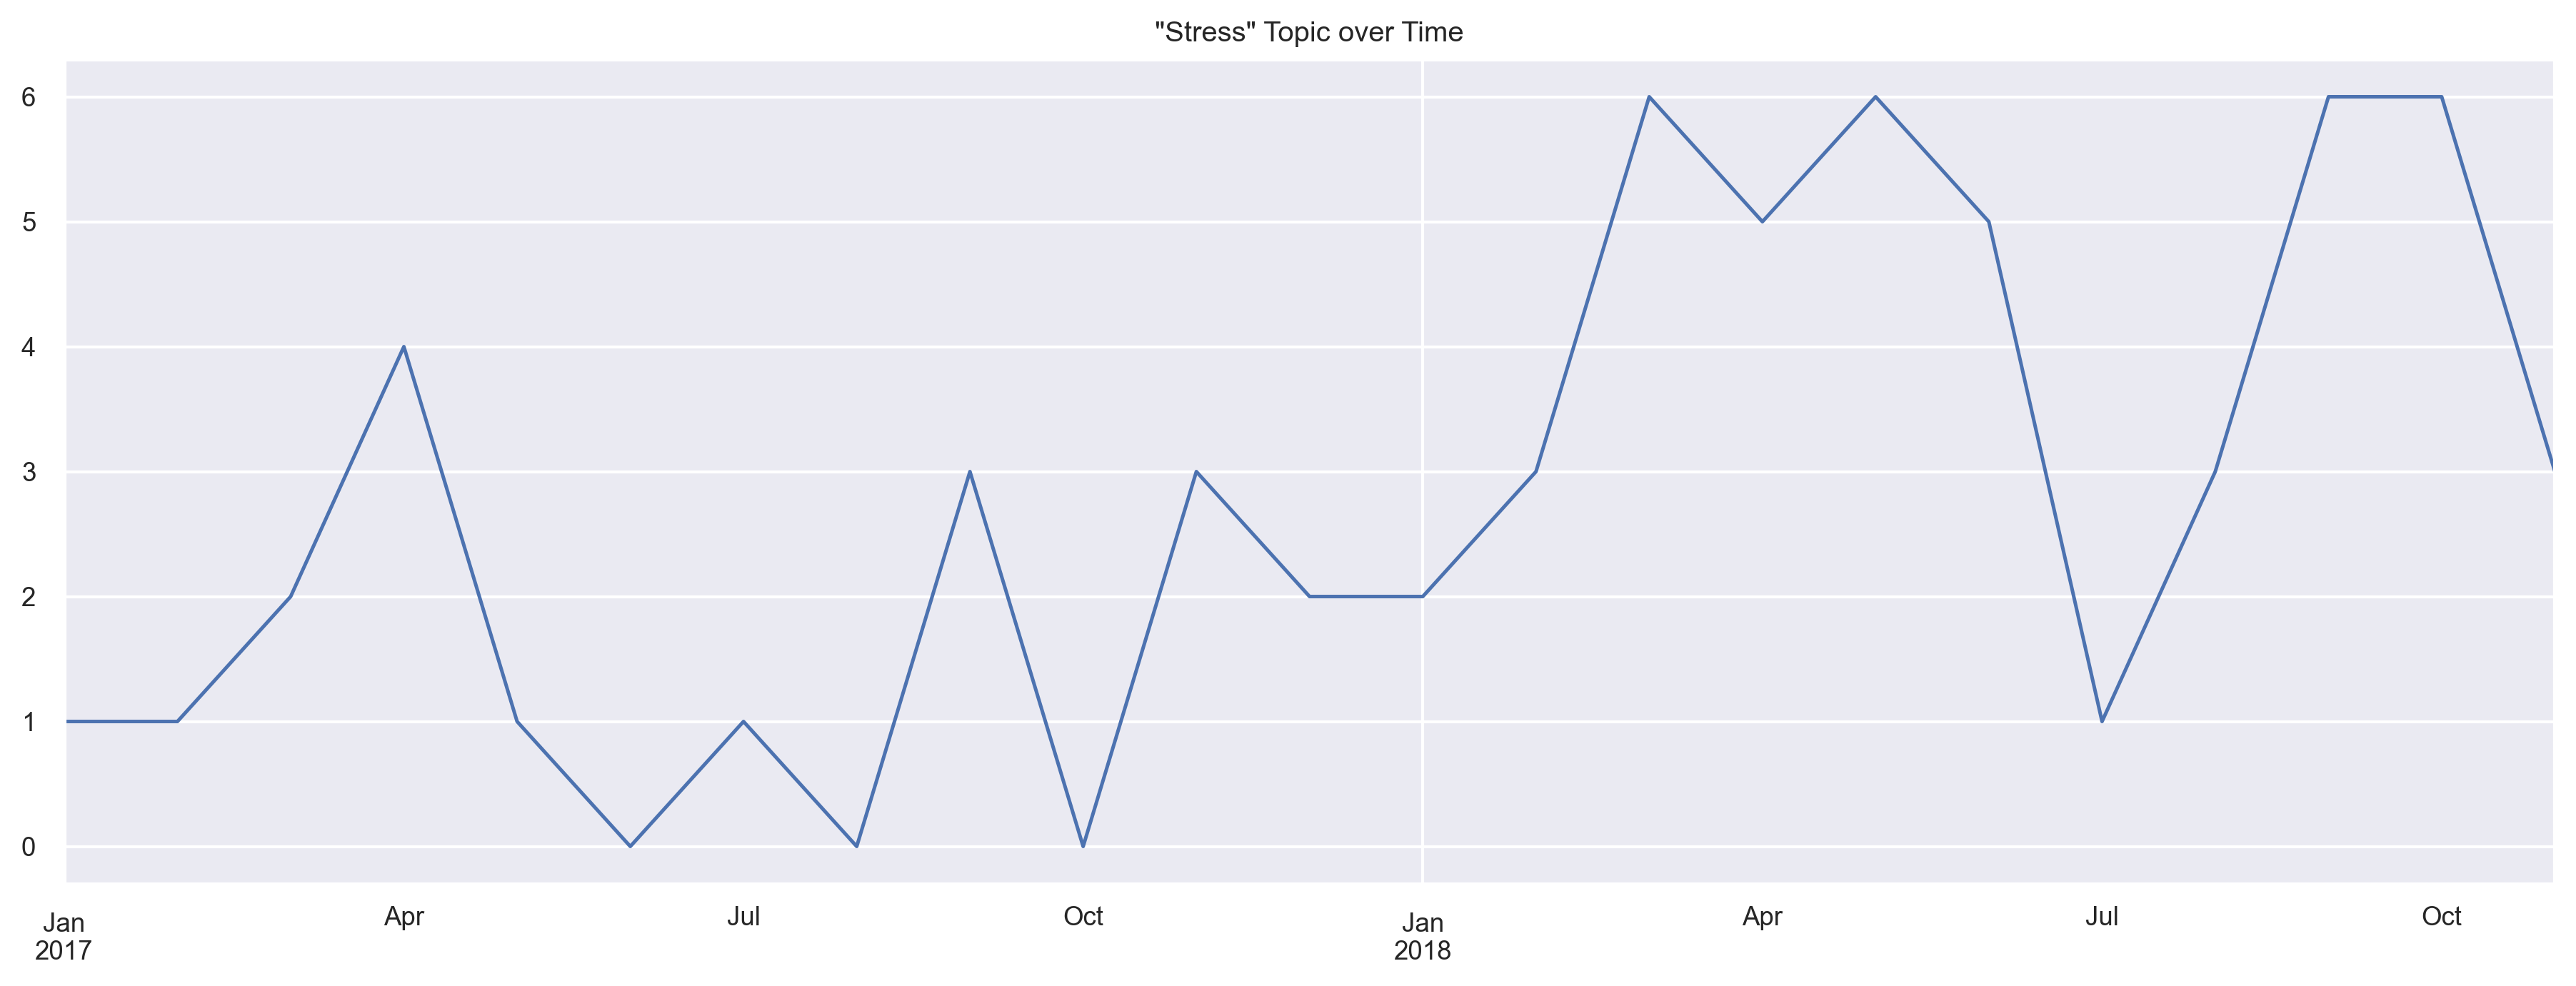

In [81]:
# let's plot the distinct total number of subreddit topics over time

for col in test_cols:
    
    plt.figure(figsize = (15, 5))
    plt.style.use('ggplot')
    sns.set(font_scale = 0.8)

    test_df[col].resample("M").sum().plot(kind = "line", linewidth = 1.2)
    plt.xlabel(None)

    plt.title(f'"{col.title()}" Topic over Time')
    plt.show()

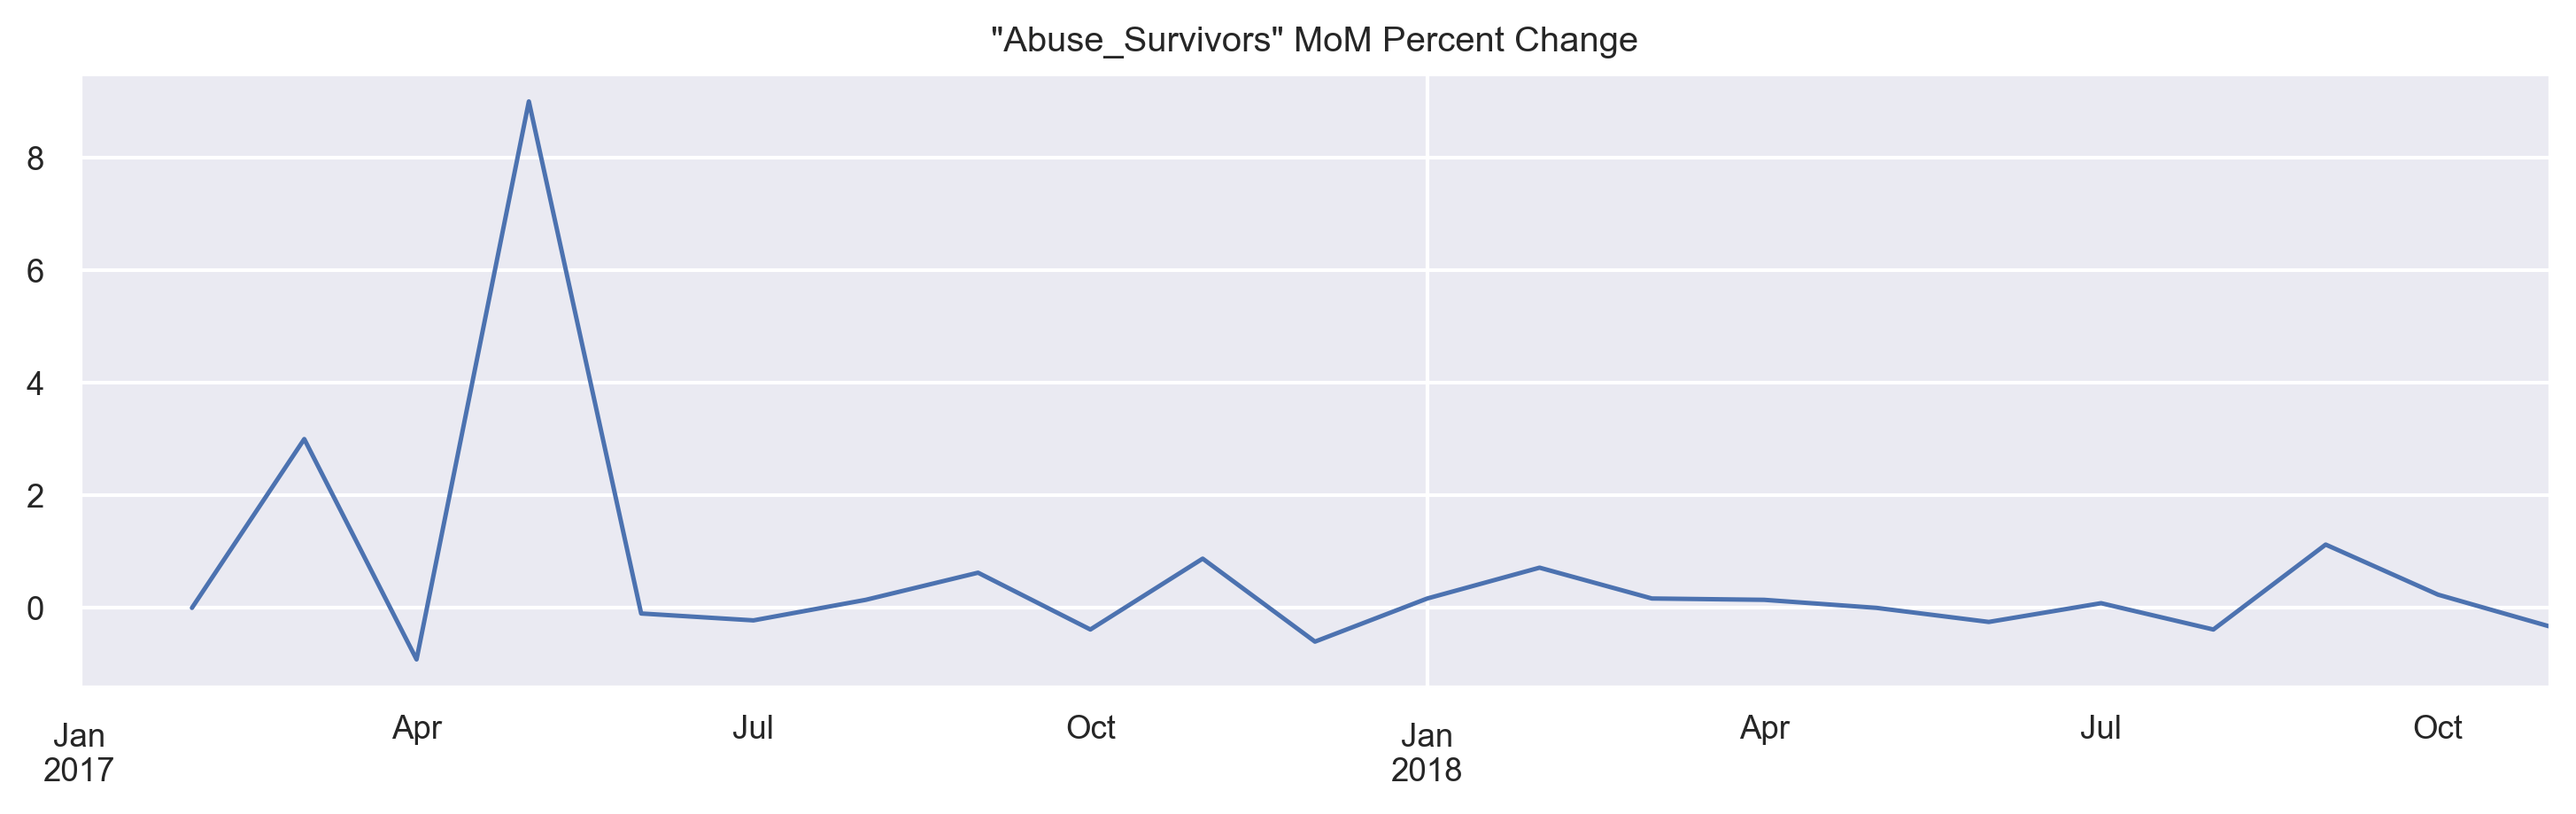

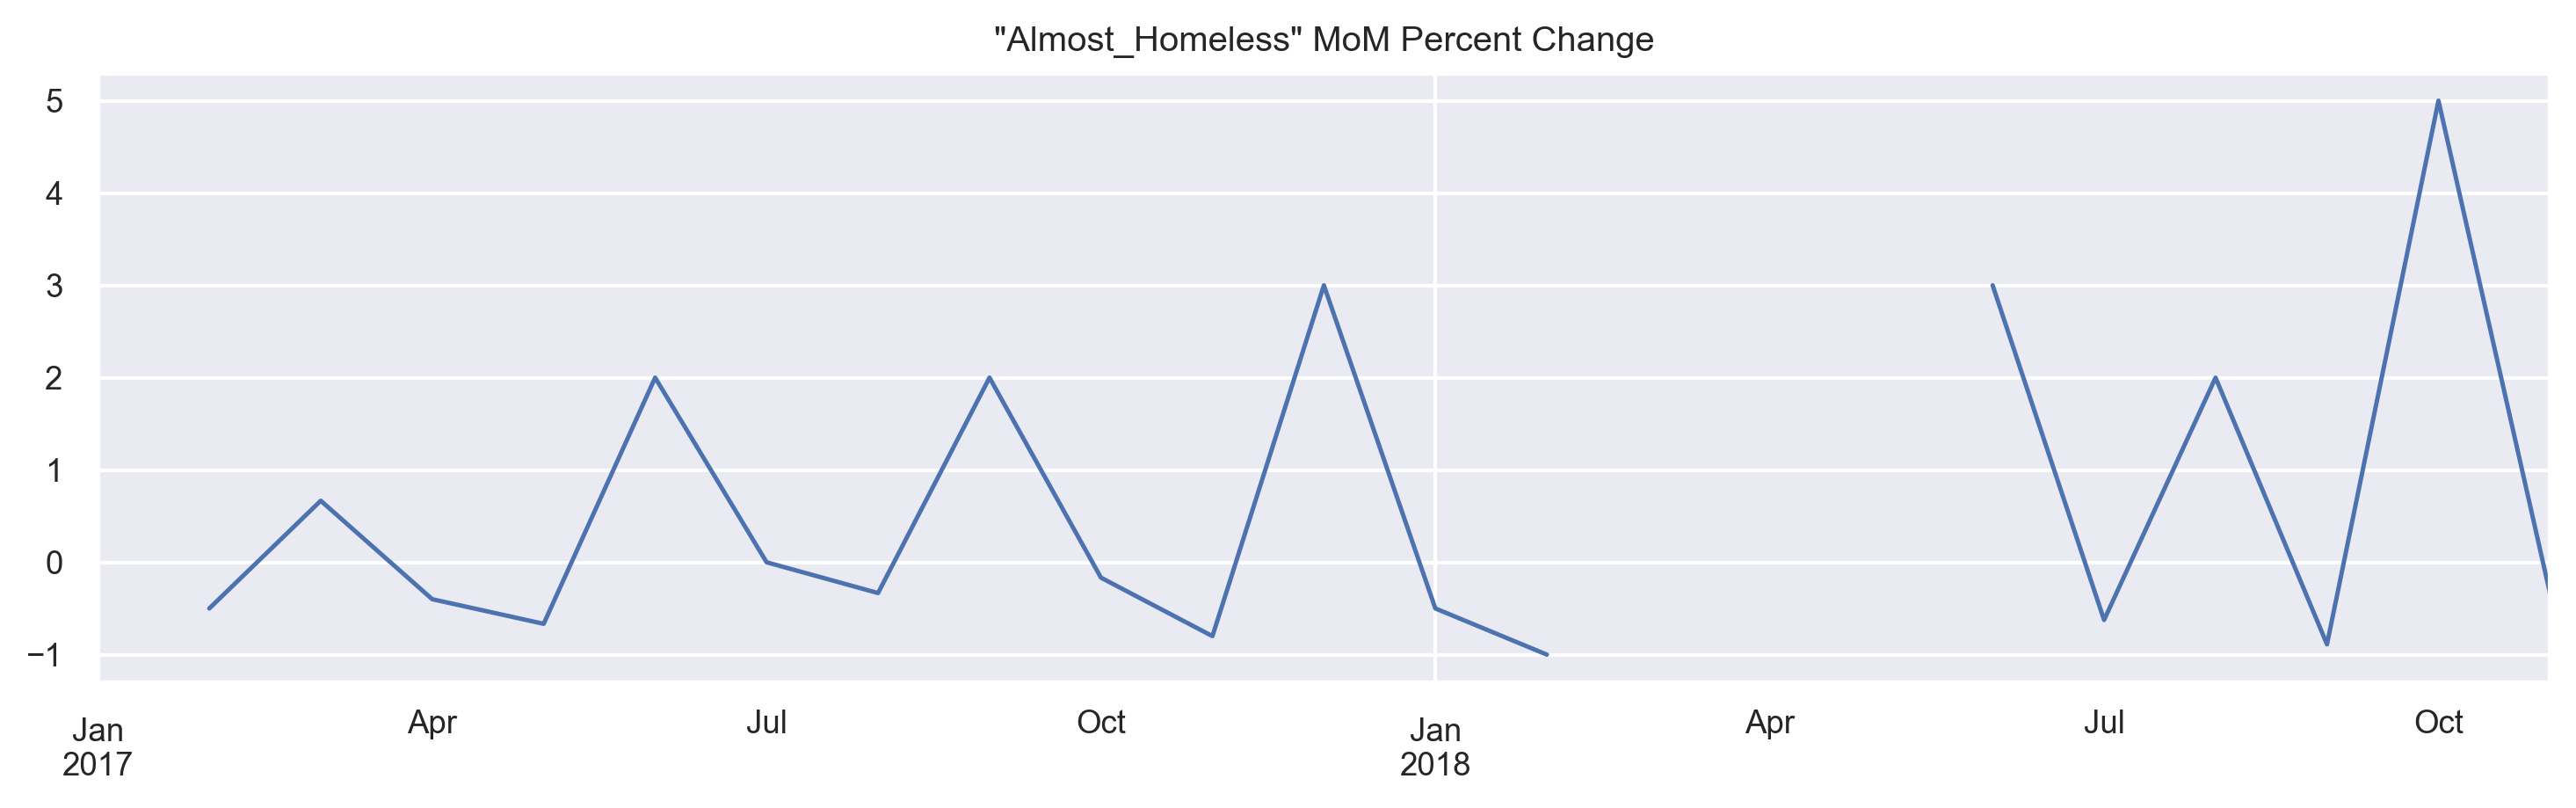

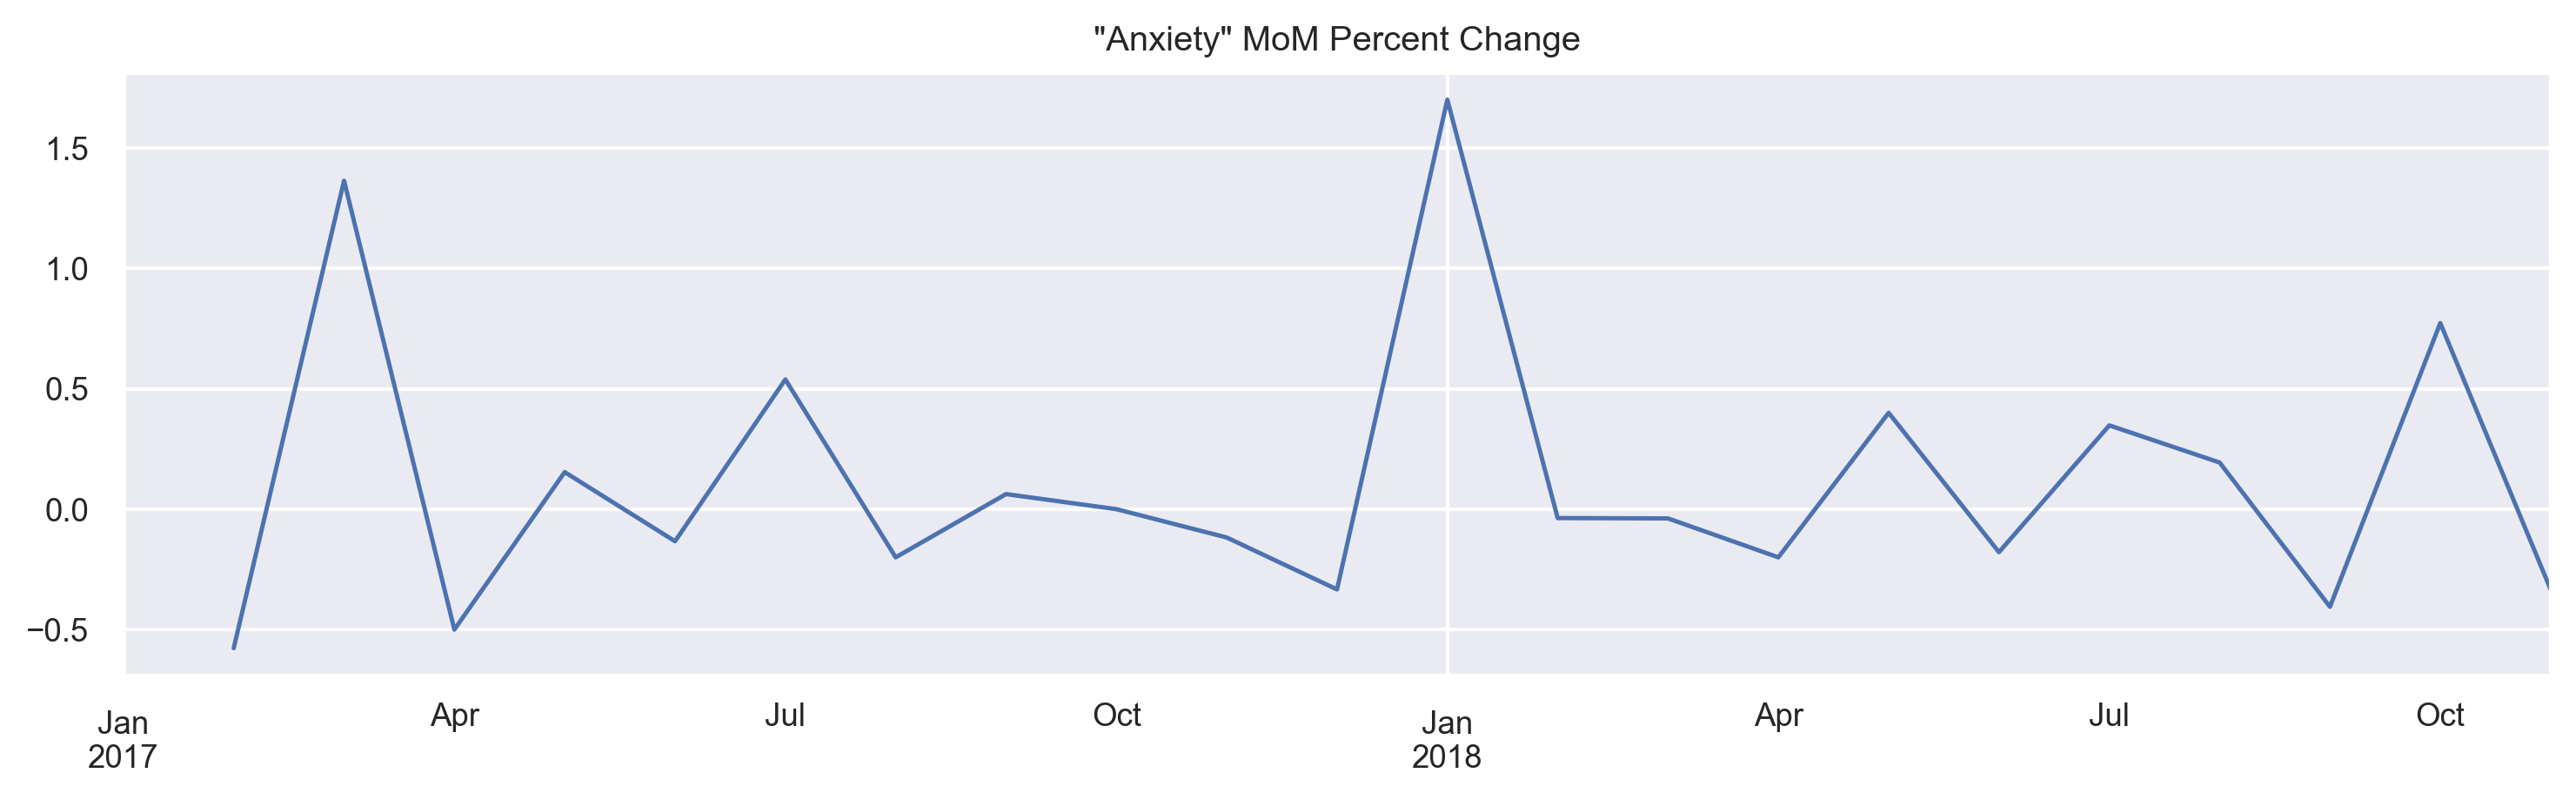

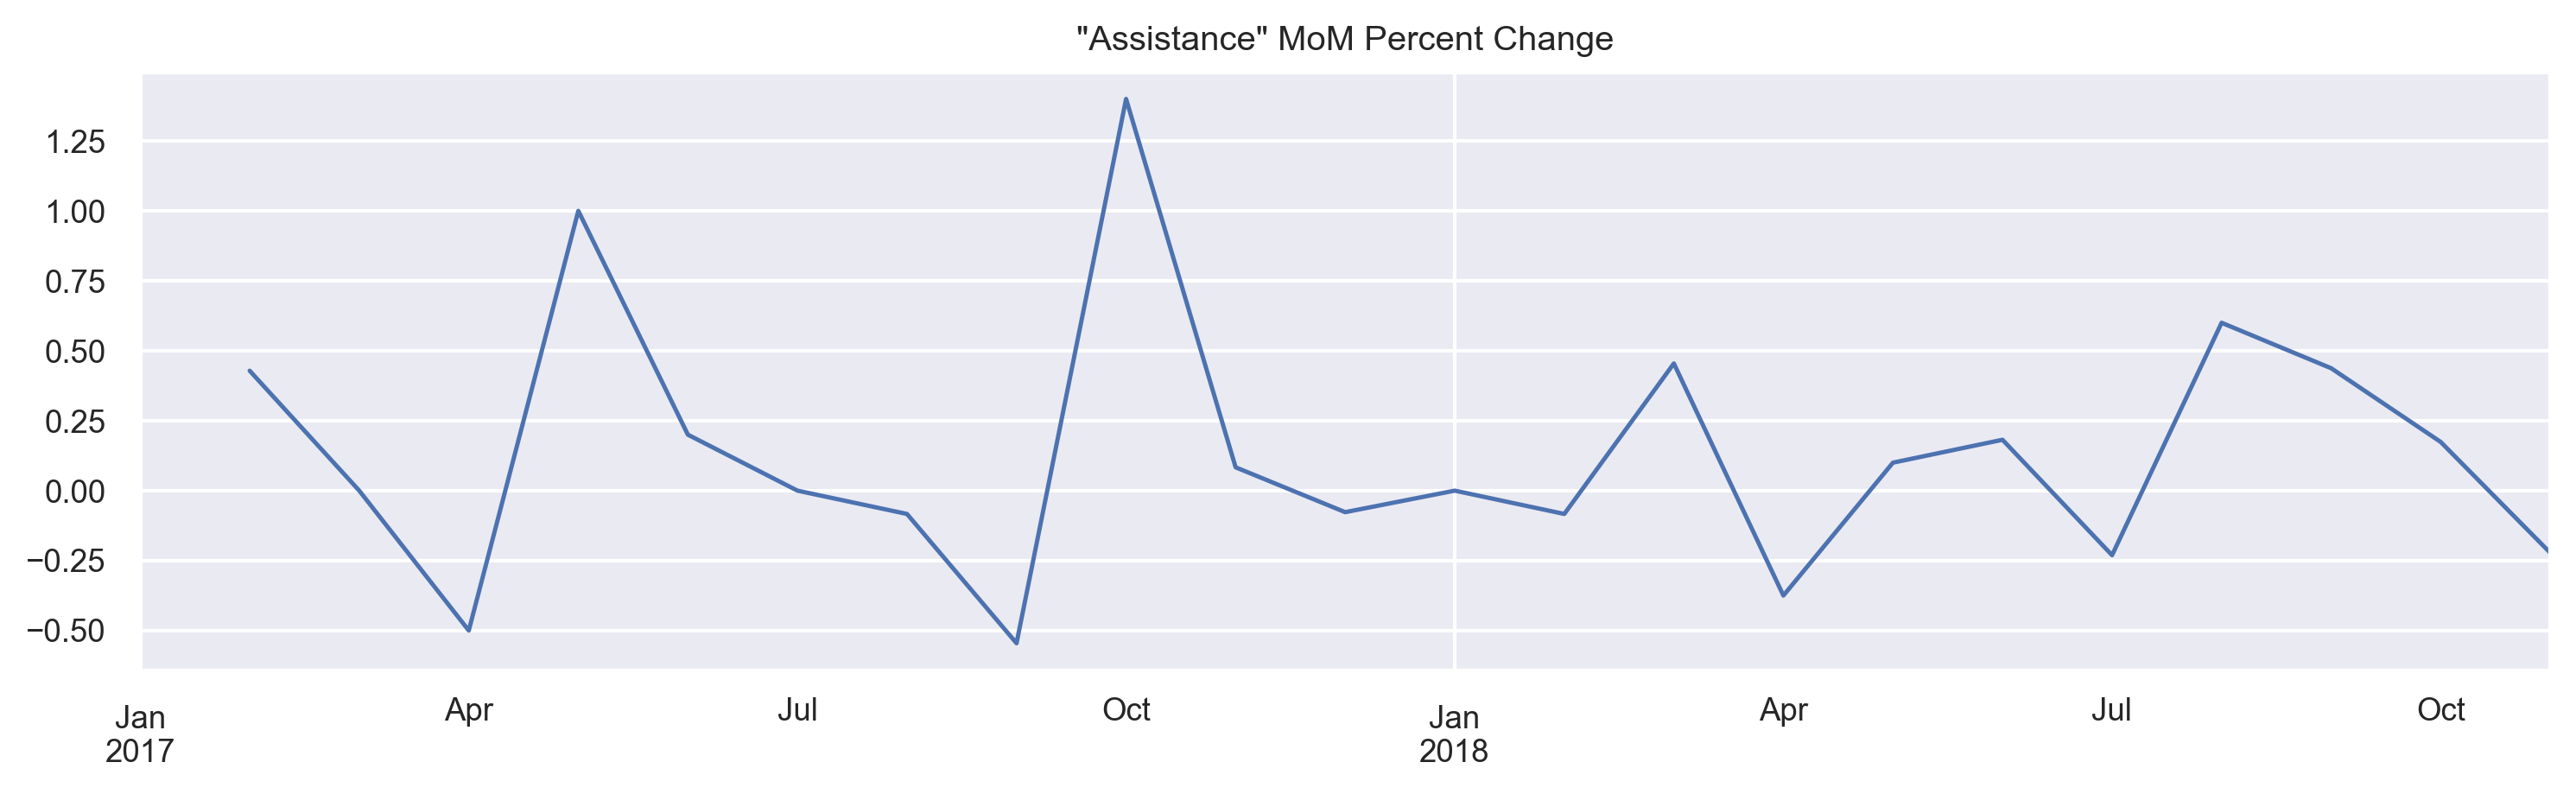

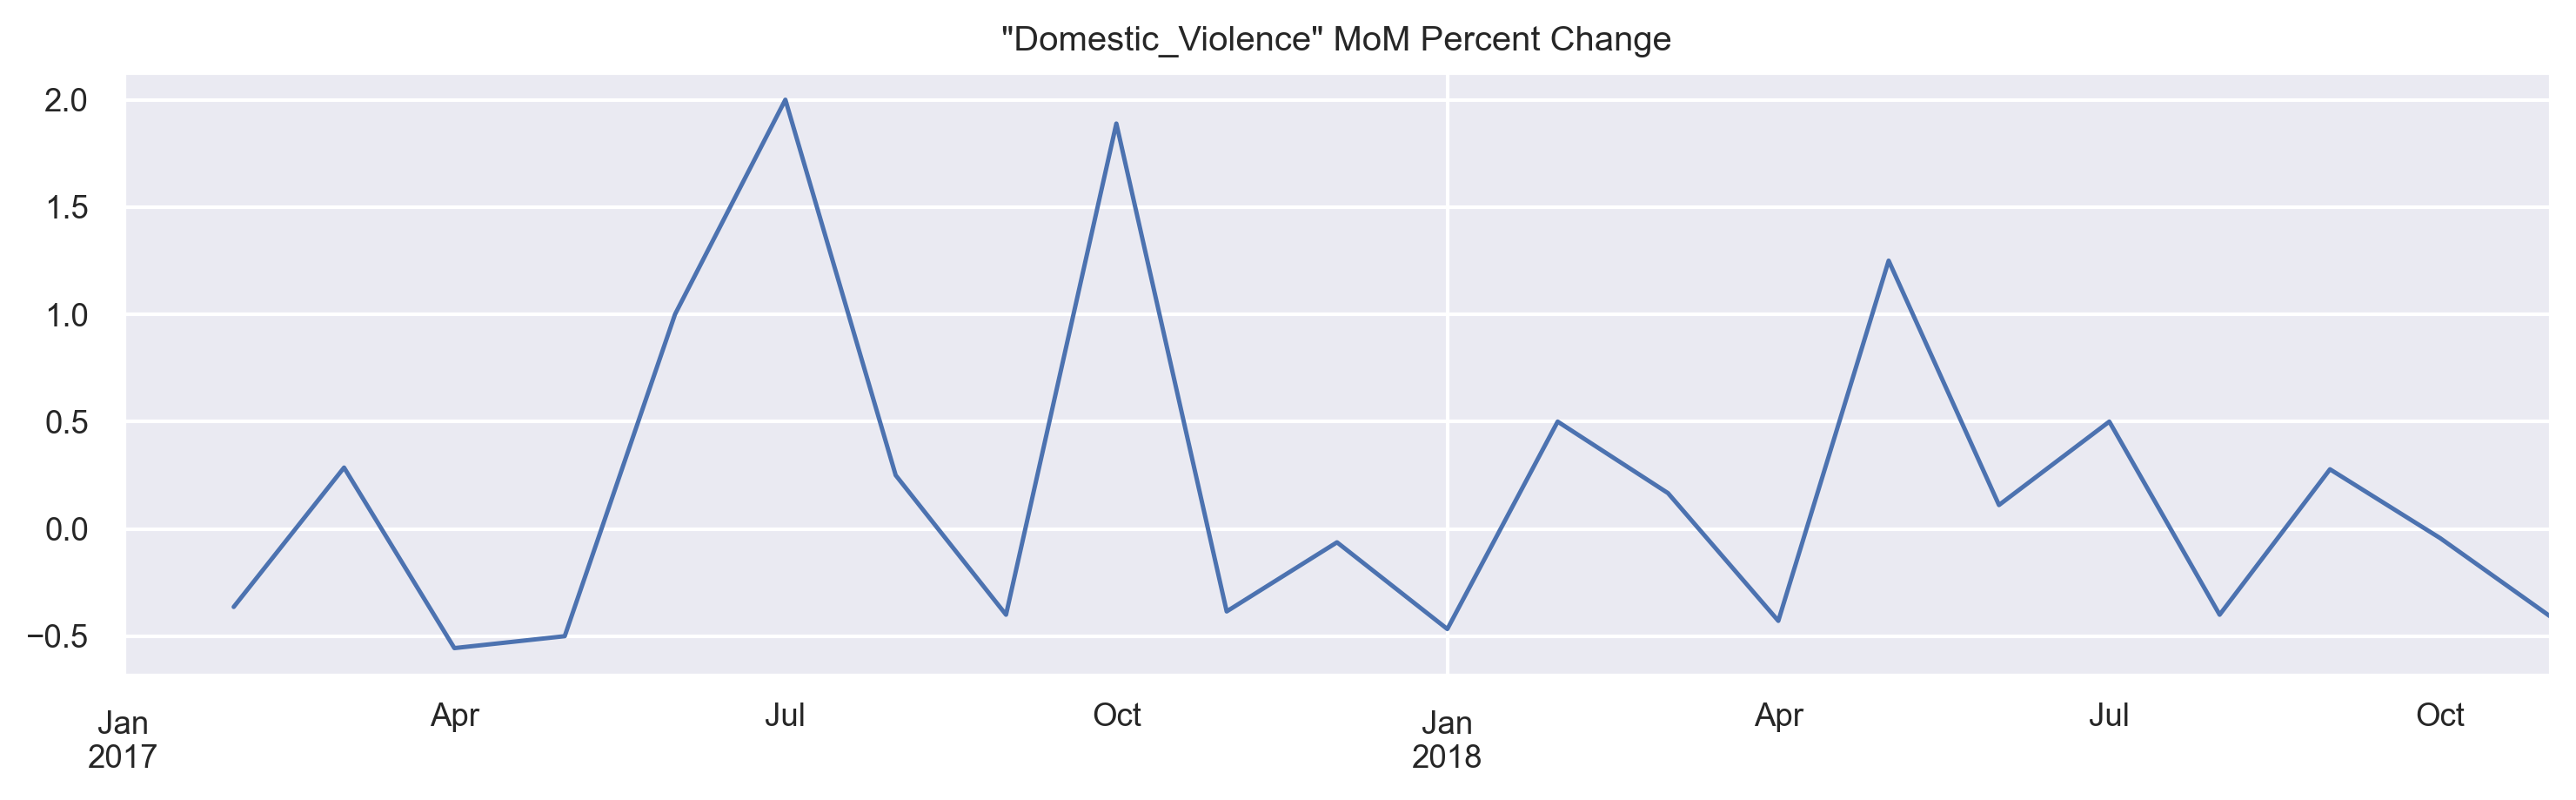

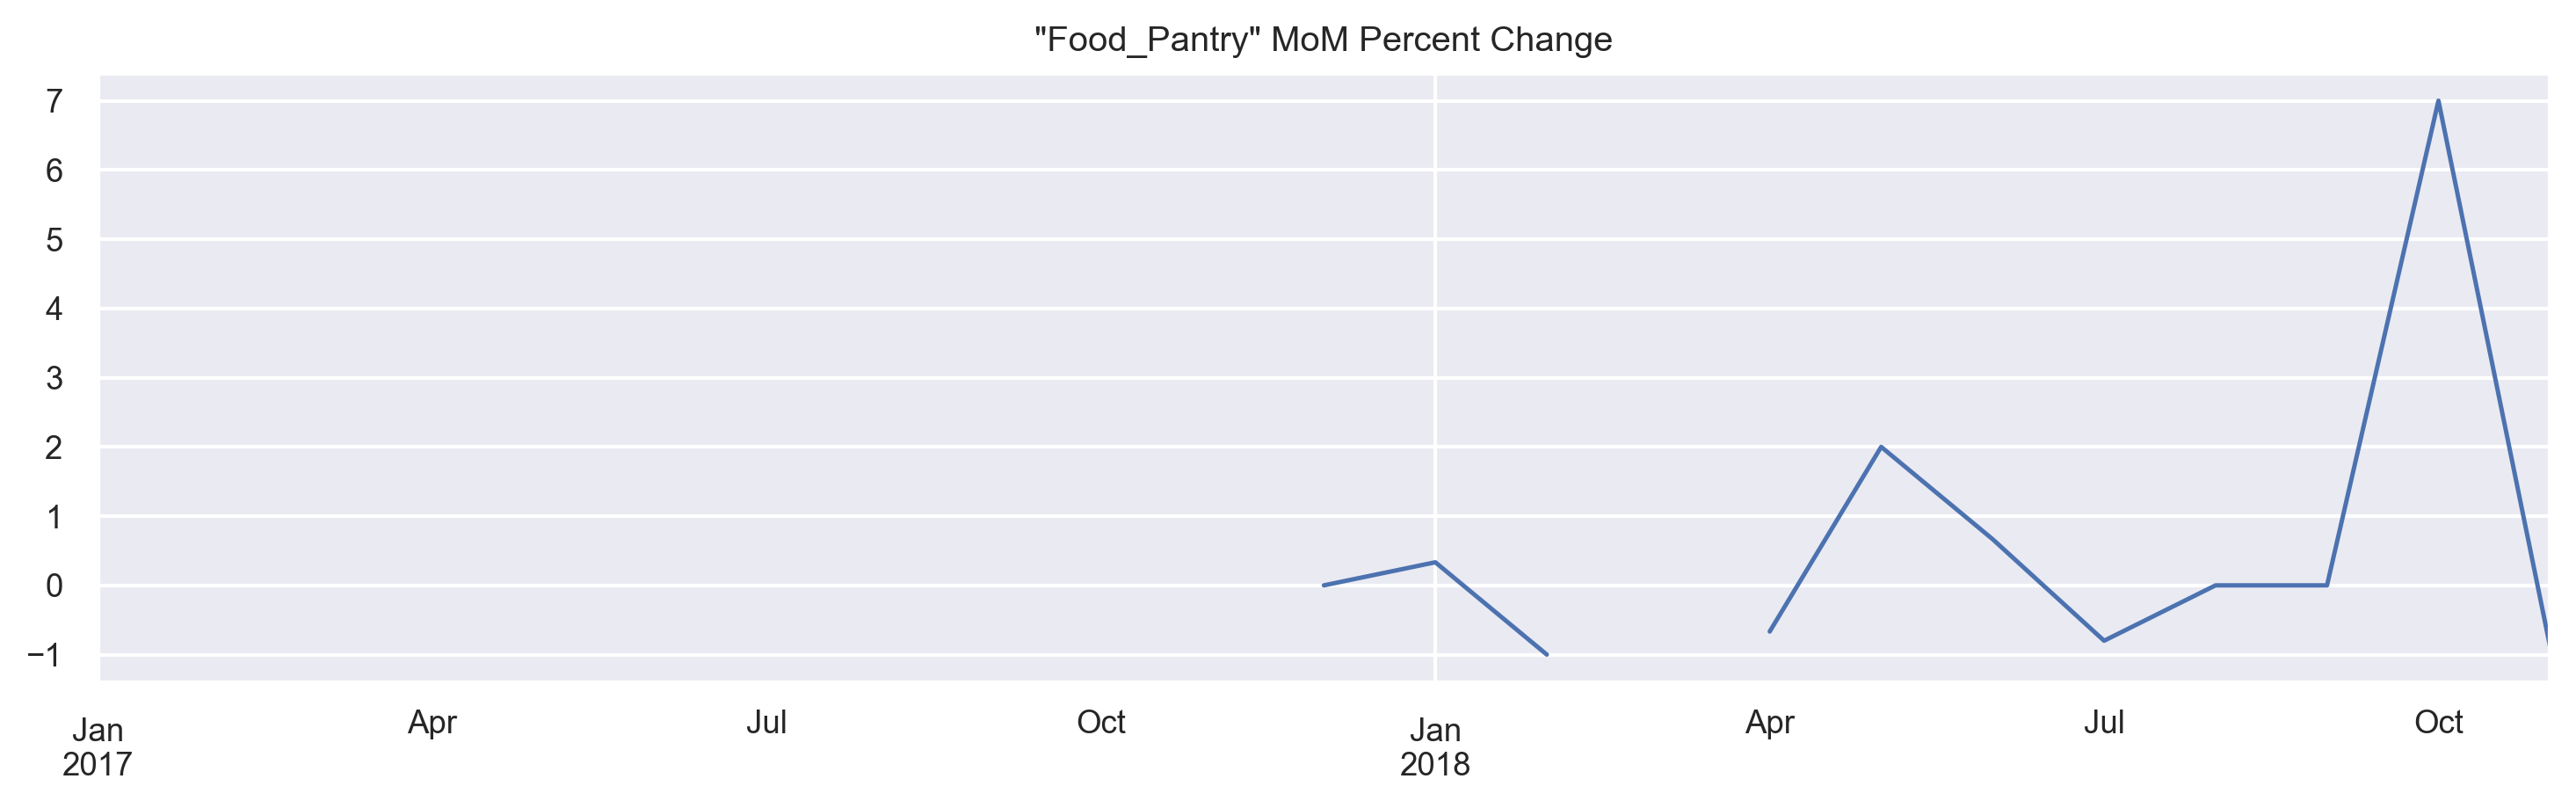

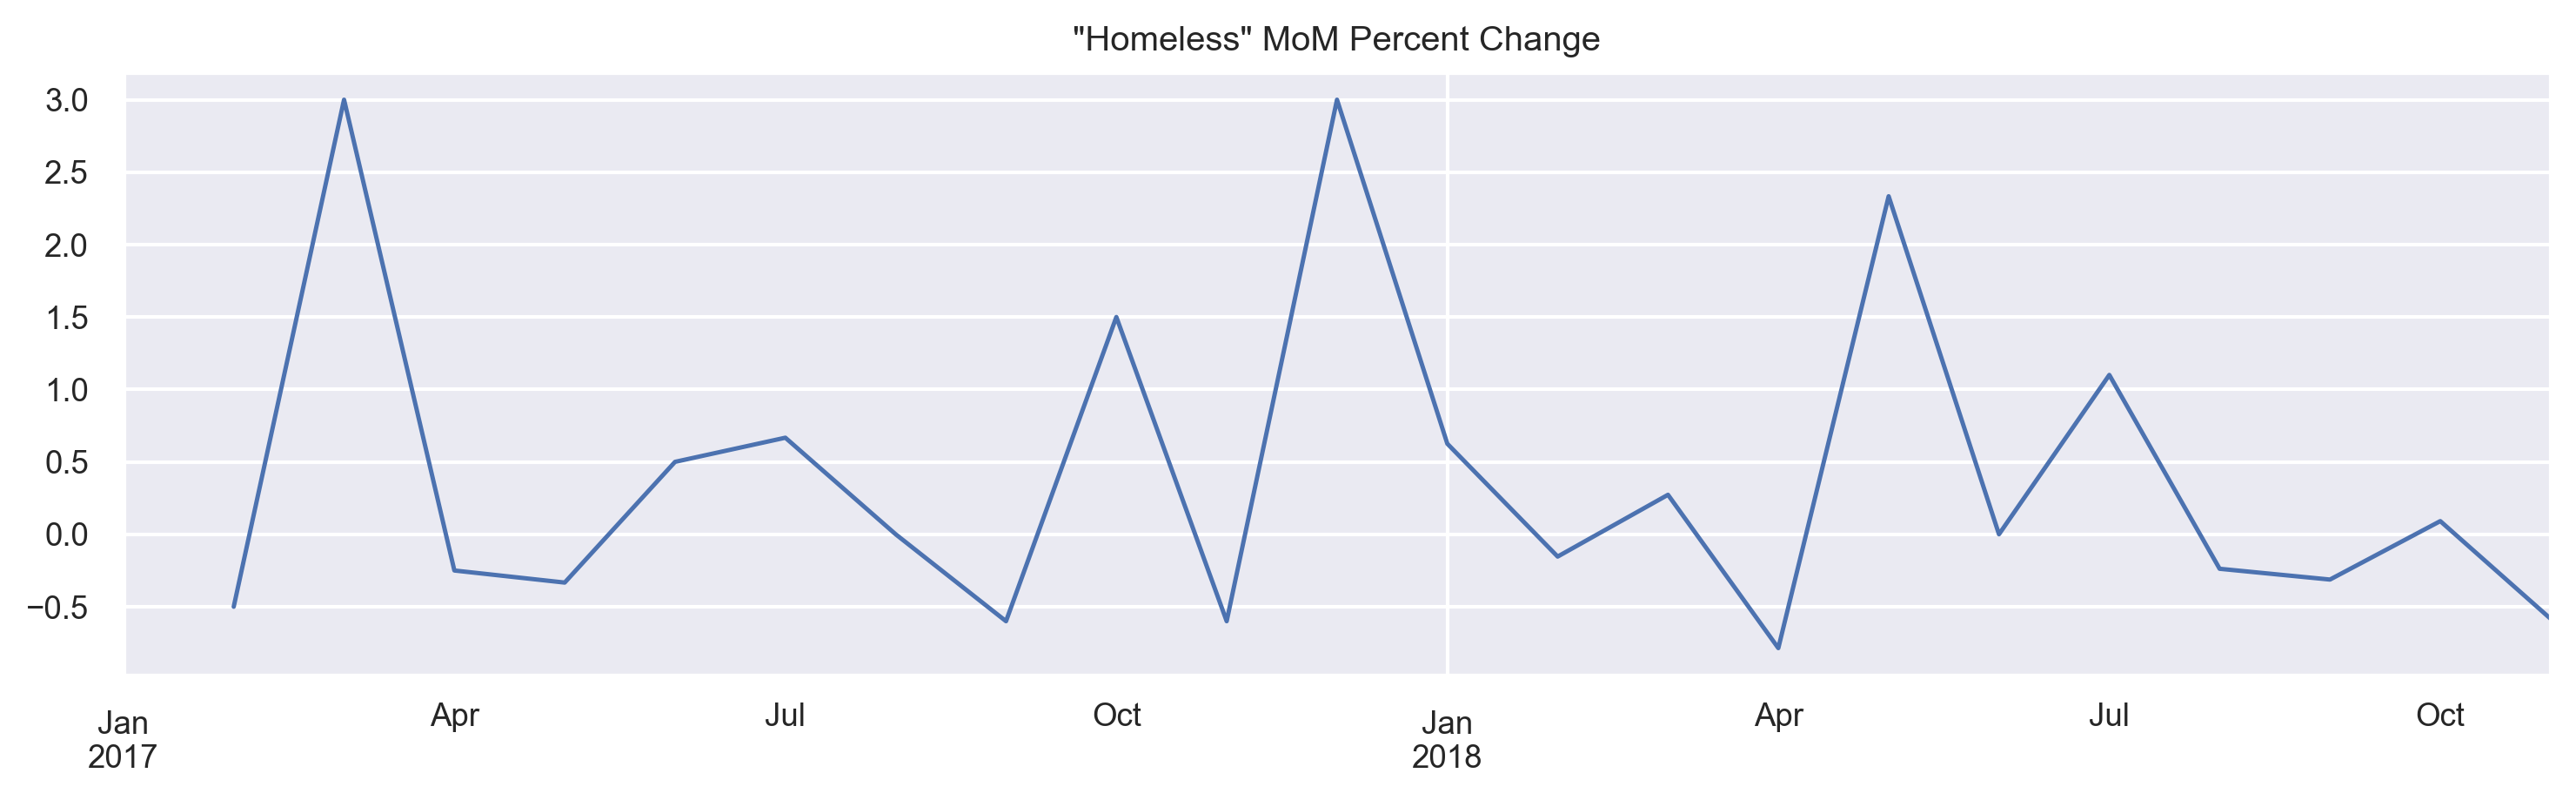

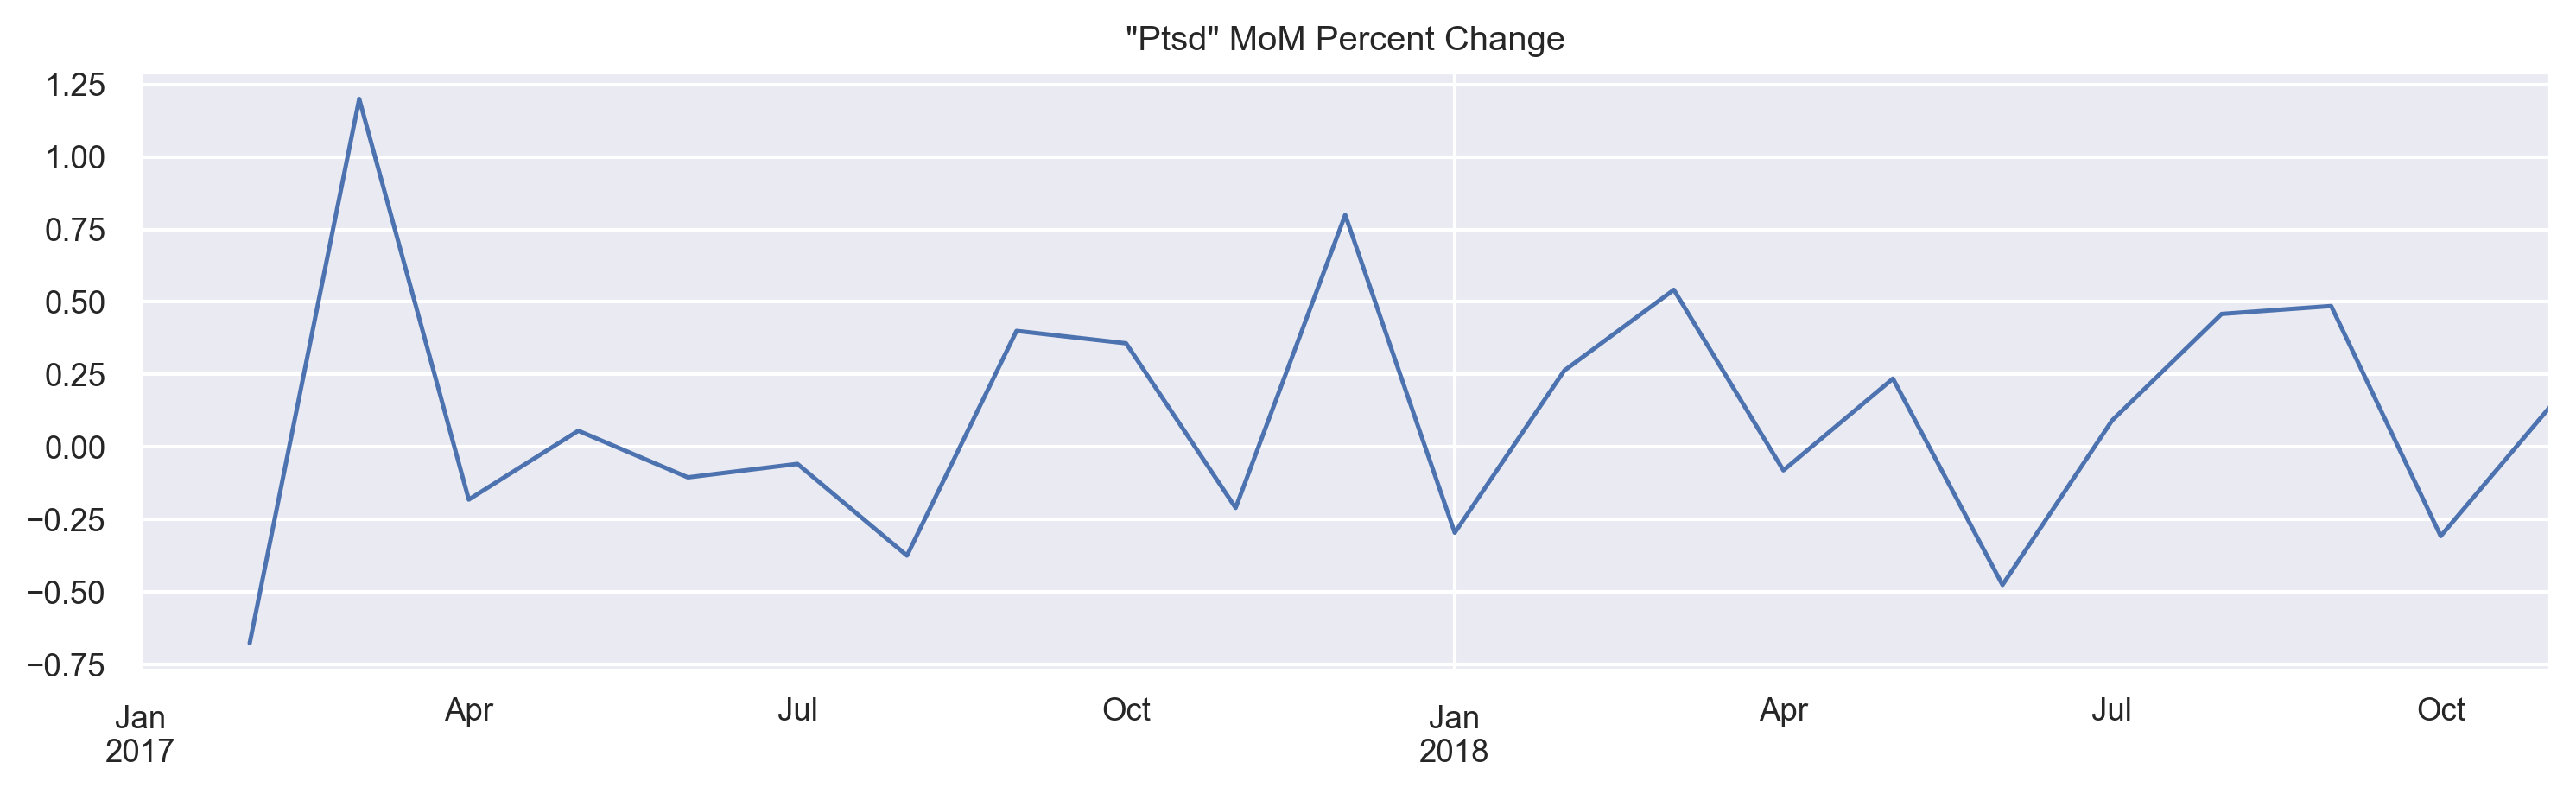

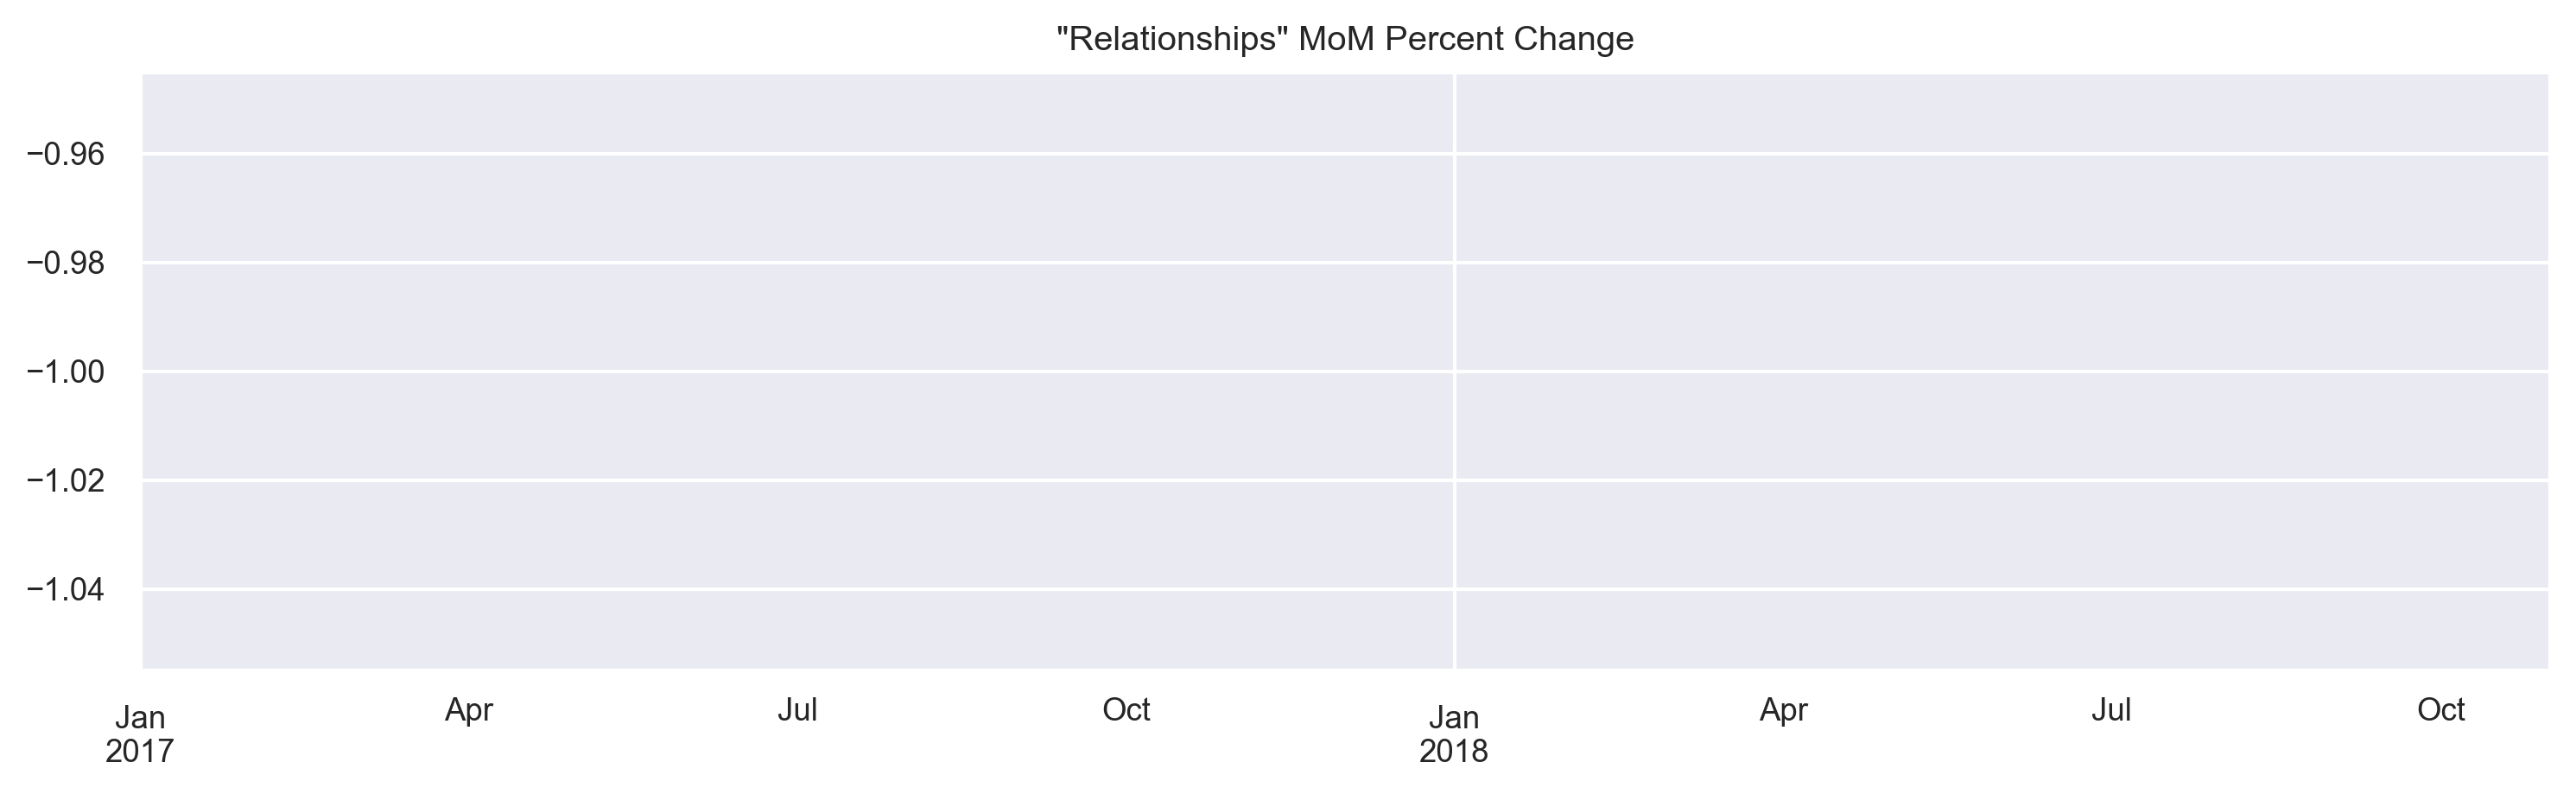

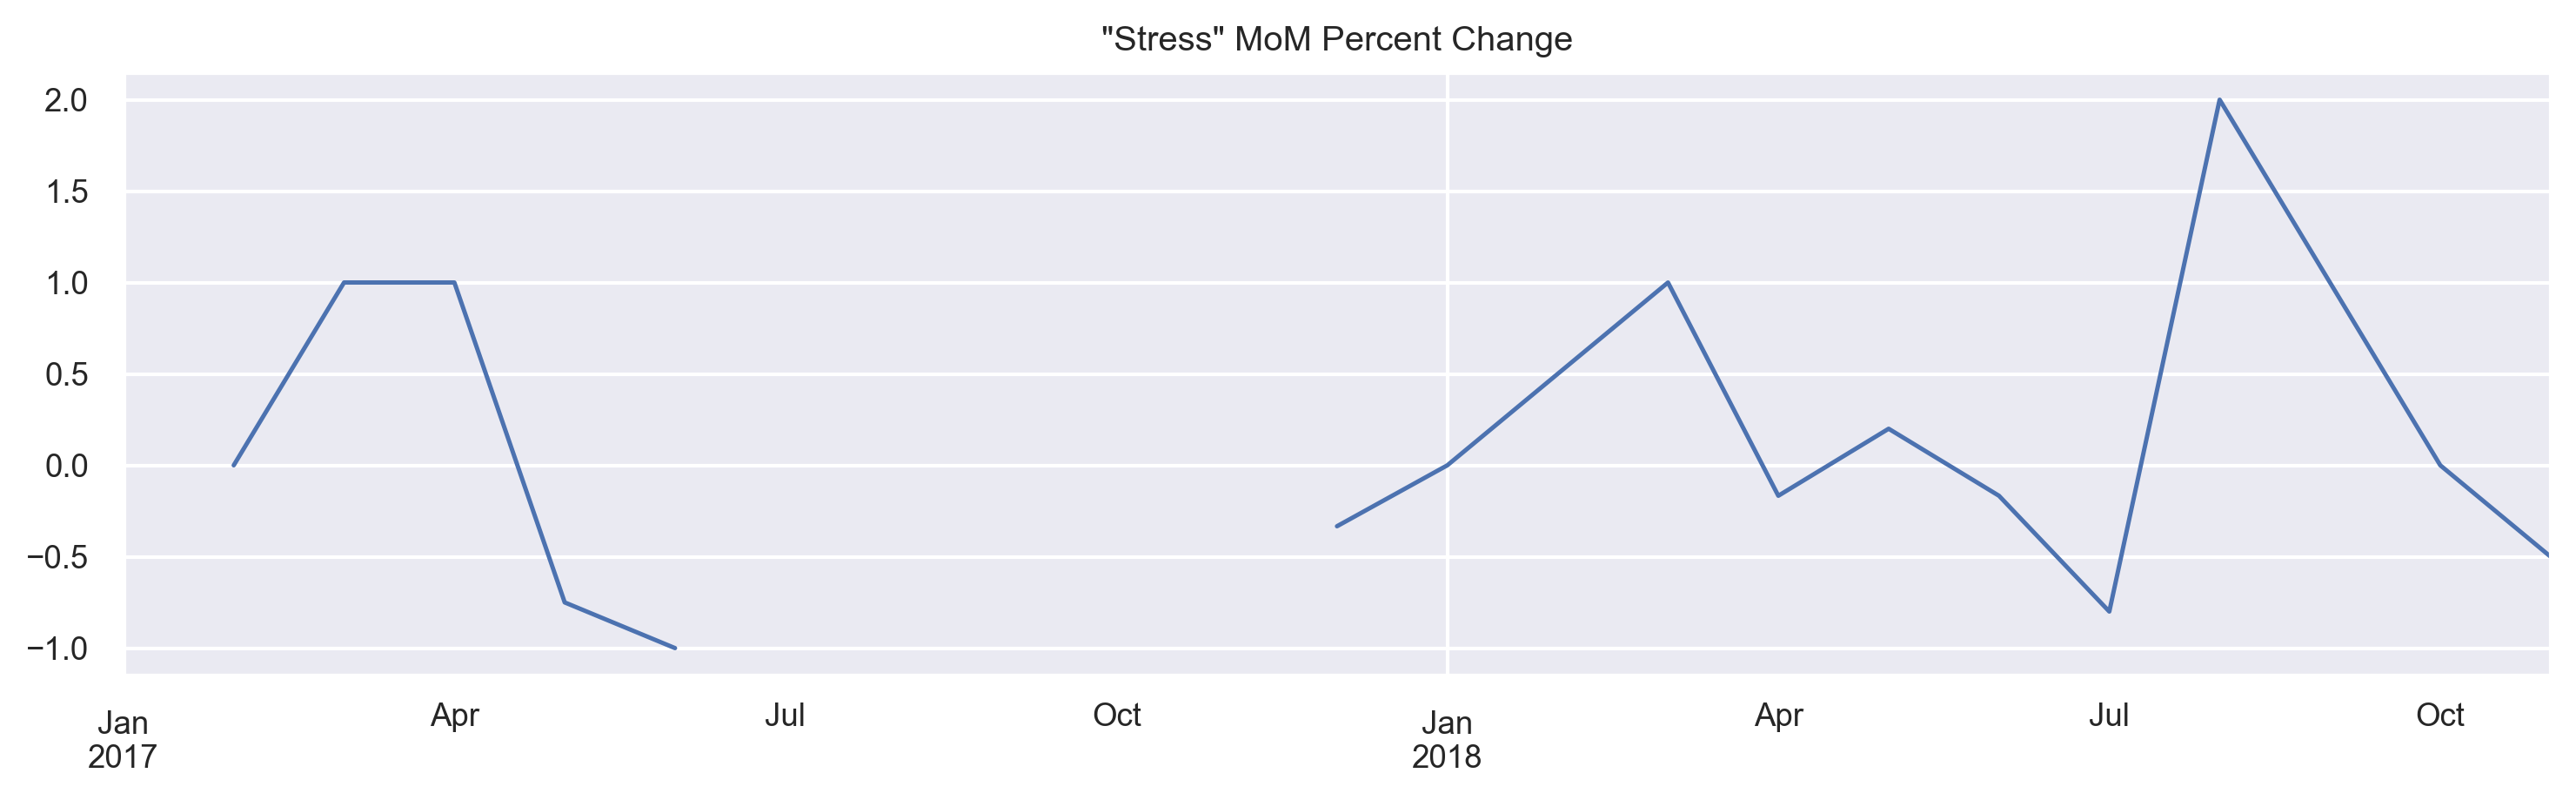

In [82]:
# i want to see the relative percent change difference from the previous month
# where JAN 2017 should reflect 0% because no change

def percent_change(x):

    if len(x):
        
        return (x[-1]-x[0])/x[0]

for col in test_cols:

    plt.figure(figsize = (12, 3))
    plt.style.use('ggplot')
    sns.set(font_scale = 0.8)

    # calculating subreddit count and month-over-month percentage change
    test_df[col].resample("M").sum().pct_change().plot(kind = "line", linewidth = 1.2)
    plt.xlabel(None)

    plt.title(f'"{col.title()}" MoM Percent Change')
    plt.show()

### ``observations/insights:``

- no trend line or breaks in plotted 'MoM percent change' represents no change from the prior month
- certain topics have relative "significant" MoM percentage changes
- it appears that there are no "distinguishable" trends accross the subreddit topics and when they are discussed/referenced throughout the studied period
- one additional step that we could consider taking is studying potential "anomalous" trends in the studied period and what real-world events may have taken place during these periods


``Since the 'subreddit' topics/labels are typically found within the context of the text -- I will forgo the idea of attempting to predict these classifications and solely focus on predicting 'stress'``

-----

In [83]:
# let's clean and glance at the text data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2838 entries, 2017-01-01 12:36:58 to 2018-11-19 01:54:20
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   label                2838 non-null   int64    
 1   post_id              2838 non-null   object   
 2   subreddit            2838 non-null   object   
 3   sentence_range       2838 non-null   object   
 4   text                 2838 non-null   object   
 5   id                   2838 non-null   int64    
 6   confidence           2838 non-null   float64  
 7   social_karma         2838 non-null   int64    
 8   syntax_ari           2838 non-null   float64  
 9   sentiment            2838 non-null   float64  
 10  social_upvote_ratio  2838 non-null   float64  
 11  social_num_comments  2838 non-null   int64    
 12  month_year           2838 non-null   period[M]
dtypes: float64(4), int64(4), object(4), period[M](1)
memory usage: 310.4+ KB


In [84]:
# check the head first

df.head(2)

,label,post_id,subreddit,sentence_range,text,id,confidence,social_karma,syntax_ari,sentiment,social_upvote_ratio,social_num_comments,month_year
social_timestamp,,,,,,,,,,,,,
2017-01-01 12:36:58,1,5lezhz,domestic_violence,"[14, 19]",He came after me a few times so I got away and...,313,0.571429,4,0.531035,0.076333,0.84,3,2017-01
2017-01-01 12:36:58,1,5lezhz,domestic_violence,"(5, 10)","We will get through this and I am determined, ...",31536,0.857143,4,8.679730,0.047222,0.84,3,2017-01


In [85]:
# cleaning the 'text' column data
# consider if it's necessary to remove words <= 2; as there are pronouns that might have 'stress' related implications (e.g., he, we, etc.)

df["text"] = df["text"].apply(mass_text_clean)
df.head() # check out!

,label,post_id,subreddit,sentence_range,text,id,confidence,social_karma,syntax_ari,sentiment,social_upvote_ratio,social_num_comments,month_year
social_timestamp,,,,,,,,,,,,,
2017-01-01 12:36:58,1,5lezhz,domestic_violence,"[14, 19]",came time got away called cop wa arrested rest...,313,0.571429,4,0.531035,0.076333,0.84,3,2017-01
2017-01-01 12:36:58,1,5lezhz,domestic_violence,"(5, 10)",get determined even mean going shelter get aff...,31536,0.857143,4,8.679730,0.047222,0.84,3,2017-01
2017-01-01 18:35:06,1,5lge1y,anxiety,"(0, 5)",currently constant state heart palptations wok...,7419,1.000000,14,7.822923,-0.083333,0.94,8,2017-01
2017-01-03 16:10:28,1,5lspep,abuse_survivors,"(5, 10)",wa fucking panic attack payed done went thrift...,18404,1.000000,5,0.633660,-0.466667,0.86,7,2017-01
2017-01-03 22:13:10,1,5luwz3,almost_homeless,"[10, 15]",afraid sell house sure future hold family made...,1804,0.800000,5,2.823077,-0.401250,0.65,15,2017-01


In [86]:
# let's solely focus on text and the target output == "label"

df = df[[ 
    "label",
    "subreddit",
    "text"
        ]].reset_index(drop = True)

df.head()

,label,subreddit,text
0,1,domestic_violence,came time got away called cop wa arrested rest...
1,1,domestic_violence,get determined even mean going shelter get aff...
2,1,anxiety,currently constant state heart palptations wok...
3,1,abuse_survivors,wa fucking panic attack payed done went thrift...
4,1,almost_homeless,afraid sell house sure future hold family made...


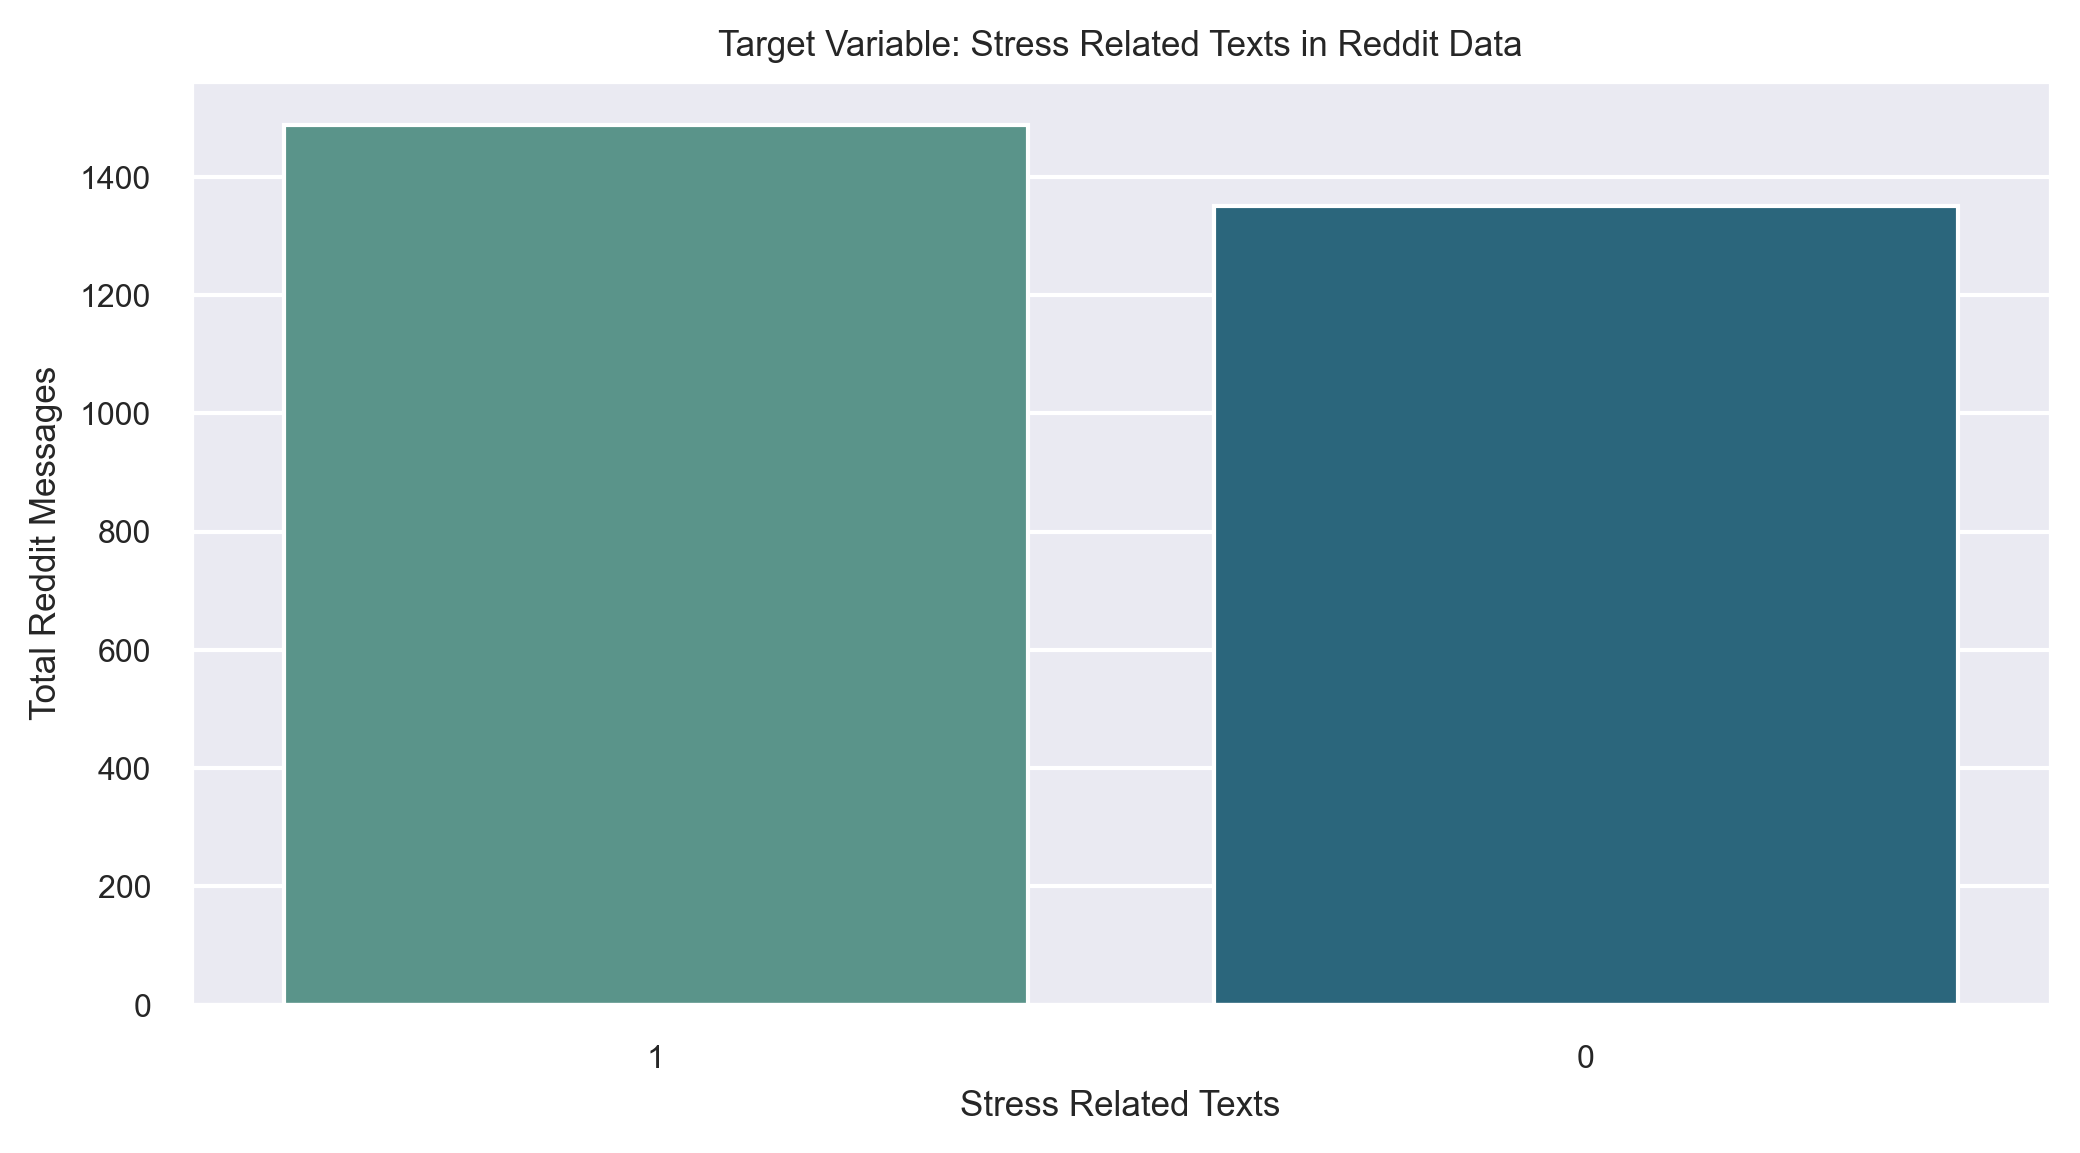

In [87]:
# what's the target variable proportion/breakdown

plt.figure(figsize = (8,4))
sns.set(font_scale = 0.7)

ax = sns.countplot( 
    data = df,
    x = "label",
    order = df["label"].value_counts().index,
    palette = "crest"
)

plt.title("Target Variable: Stress Related Texts in Reddit Data")
plt.ylabel("Total Reddit Messages")
plt.xlabel("Stress Related Texts")
plt.show()

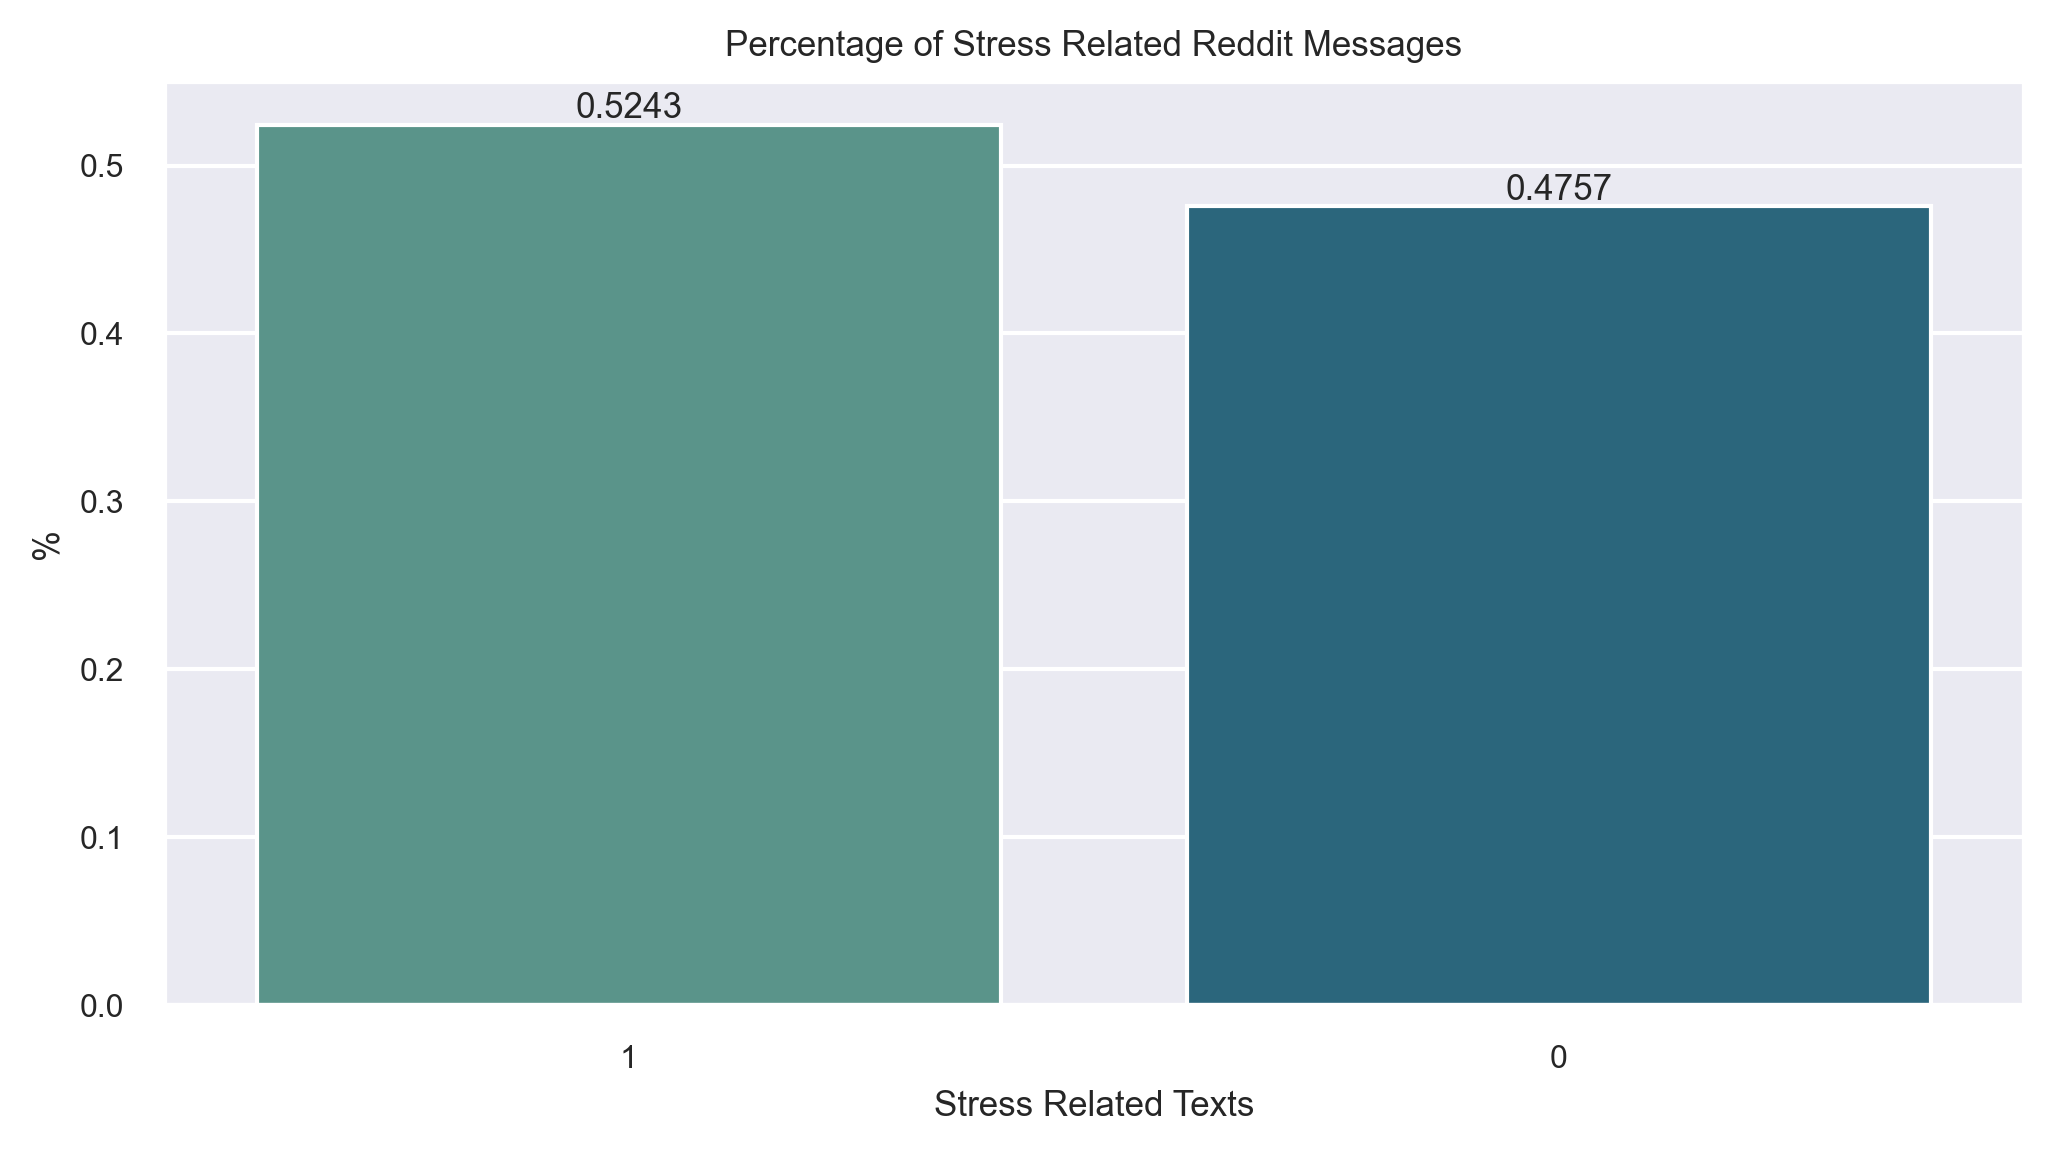

In [88]:
# let's view the target variable as a percentage of total

plt.figure(figsize = (8,4))
sns.set(font_scale = 0.7)

ax = sns.barplot( 
    data = df,
    y = df["label"].value_counts(normalize = True).values,
    x = df["label"].value_counts(normalize = True).index,
    order = df["label"].value_counts(normalize = True).index,
    palette = "crest"
)

ax.bar_label(ax.containers[0], fmt = '%.4f')
plt.title("Percentage of Stress Related Reddit Messages")
plt.ylabel("%")

plt.xlabel("Stress Related Texts")
plt.show()

In [89]:
# showing labels/target as count and percentage of total

prepare.show_counts_and_ratios(df, "label")

,n,percent
1,1488,0.524313
0,1350,0.475687


----
### ``Splitting the Data``

In [90]:
# split the reddit "stress" dataset into train, validate, and test

train, validate, test = prepare.train_validate_test_split(df, "label")

train shape: (1589, 3)
validate shape: (681, 3)
test shape: (568, 3)


In [91]:
train.head()

,label,subreddit,text
48,1,anxiety,suffered mild diagnosed 4 year logical rationa...
1648,1,abuse_survivors,feel like cannot trust anyone truly feel never...
923,0,relationships,thing enjoy see big deal seems perceive grand ...
1238,0,relationships,talk morning life went next year would continu...
2760,0,ptsd,everyone edit title say reading symptom btw fe...


In [92]:
# viewing reddit text data by subreddit topics

train.subreddit.unique().tolist()

['anxiety',
 'abuse_survivors',
 'relationships',
 'ptsd',
 'almost_homeless',
 'domestic_violence',
 'food_pantry',
 'homeless',
 'assistance',
 'stress']

In [93]:
# splitting the text by subreddit

all_text = ' '.join(train.text).split()

almost_homeless_text = ' '.join(train.text[train["subreddit"] == 'almost_homeless']).split()

assistance_text = ' '.join(train.text[train["subreddit"] == 'assistance']).split()

anxiety_text = ' '.join(train.text[train["subreddit"] == 'anxiety']).split()

domestic_violence_text = ' '.join(train.text[train["subreddit"] == 'domestic_violence']).split()

food_pantry_text = ' '.join(train.text[train["subreddit"] == 'food_pantry']).split()

homeless_text = ' '.join(train.text[train["subreddit"] == 'homeless']).split()

ptsd_text = ' '.join(train.text[train["subreddit"] == 'ptsd']).split()

relationships_text = ' '.join(train.text[train["subreddit"] == 'relationships']).split()

stress_text = ' '.join(train.text[train["subreddit"] == 'stress']).split()

survivors_text = ' '.join(train.text[train["subreddit"] == 'abuse_survivors']).split()

In [94]:
# what about individual word counts?

all_freq = pd.Series(all_text).value_counts()

almost_homeless_freq = pd.Series(almost_homeless_text).value_counts()

assistance_freq = pd.Series(assistance_text).value_counts()

axiety_freq = pd.Series(anxiety_text).value_counts()

domestic_violence_freq = pd.Series(domestic_violence_text).value_counts()

food_pantry_freq = pd.Series(food_pantry_text).value_counts()

homeless_freq = pd.Series(homeless_text).value_counts()

ptsd_freq = pd.Series(ptsd_text).value_counts()

relationships_freq = pd.Series(relationships_text).value_counts()

stress_freq = pd.Series(stress_text).value_counts()

survivors_freq = pd.Series(survivors_text).value_counts()

In [95]:
# viewing total number of unique words by subreddit topic

subreddits = [
    'all_text',
    'almost_homeless_text',
    'assistance_text',
    'anxiety_text',
    'domestic_violence_text',
    'food_pantry_text',
    'homeless_text',
    'ptsd_text',
    'relationships_text',
    'stress_text',
    'survivors_text']

frames = [
    all_text,
    almost_homeless_text,
    assistance_text,
    anxiety_text,
    domestic_violence_text,
    food_pantry_text,
    homeless_text,
    ptsd_text,
    relationships_text,
    stress_text,
    survivors_text]

for i in range(len(subreddits)):
    
        print(subreddits[i] + ": " + str(len(frames[i])))
        print('--------------------------------')

all_text: 63275
--------------------------------
almost_homeless_text: 1923
--------------------------------
assistance_text: 6635
--------------------------------
anxiety_text: 10674
--------------------------------
domestic_violence_text: 6925
--------------------------------
food_pantry_text: 792
--------------------------------
homeless_text: 3577
--------------------------------
ptsd_text: 13299
--------------------------------
relationships_text: 12565
--------------------------------
stress_text: 1470
--------------------------------
survivors_text: 5415
--------------------------------


In [96]:
df.head()

,label,subreddit,text
0,1,domestic_violence,came time got away called cop wa arrested rest...
1,1,domestic_violence,get determined even mean going shelter get aff...
2,1,anxiety,currently constant state heart palptations wok...
3,1,abuse_survivors,wa fucking panic attack payed done went thrift...
4,1,almost_homeless,afraid sell house sure future hold family made...


In [97]:
# visualize subreddit topics by total number of words
# place "all text" as benchmark plot
# done in two (2) step process 
# step 1: for ea. row, count the total number of individual words in "text" column -- create a new column called "word_count"
# step 2: use a "groupby" method on "subreddit" column/topic and add all figures in "word_count" column

In [98]:
# step 1: for ea. row, count the total number of individual words in "text" column -- 
# create a new column called "word_count"

df["word_count"] = df["text"].str.split().str.len()
df.head() # checks out!

,label,subreddit,text,word_count
0,1,domestic_violence,came time got away called cop wa arrested rest...,44
1,1,domestic_violence,get determined even mean going shelter get aff...,50
2,1,anxiety,currently constant state heart palptations wok...,32
3,1,abuse_survivors,wa fucking panic attack payed done went thrift...,29
4,1,almost_homeless,afraid sell house sure future hold family made...,42


In [99]:
# step 2: use a "groupby" method on "subreddit" column/topic and add all figures in "word_count" column

sum_of_words = df.groupby("subreddit")["word_count"].agg("sum").sort_values(ascending = False)
sum_of_words

subreddit
ptsd                 22196
relationships        21586
anxiety              19595
domestic_violence    12033
assistance           11411
abuse_survivors      10117
homeless              6852
almost_homeless       3168
stress                2849
food_pantry           1290
Name: word_count, dtype: int64

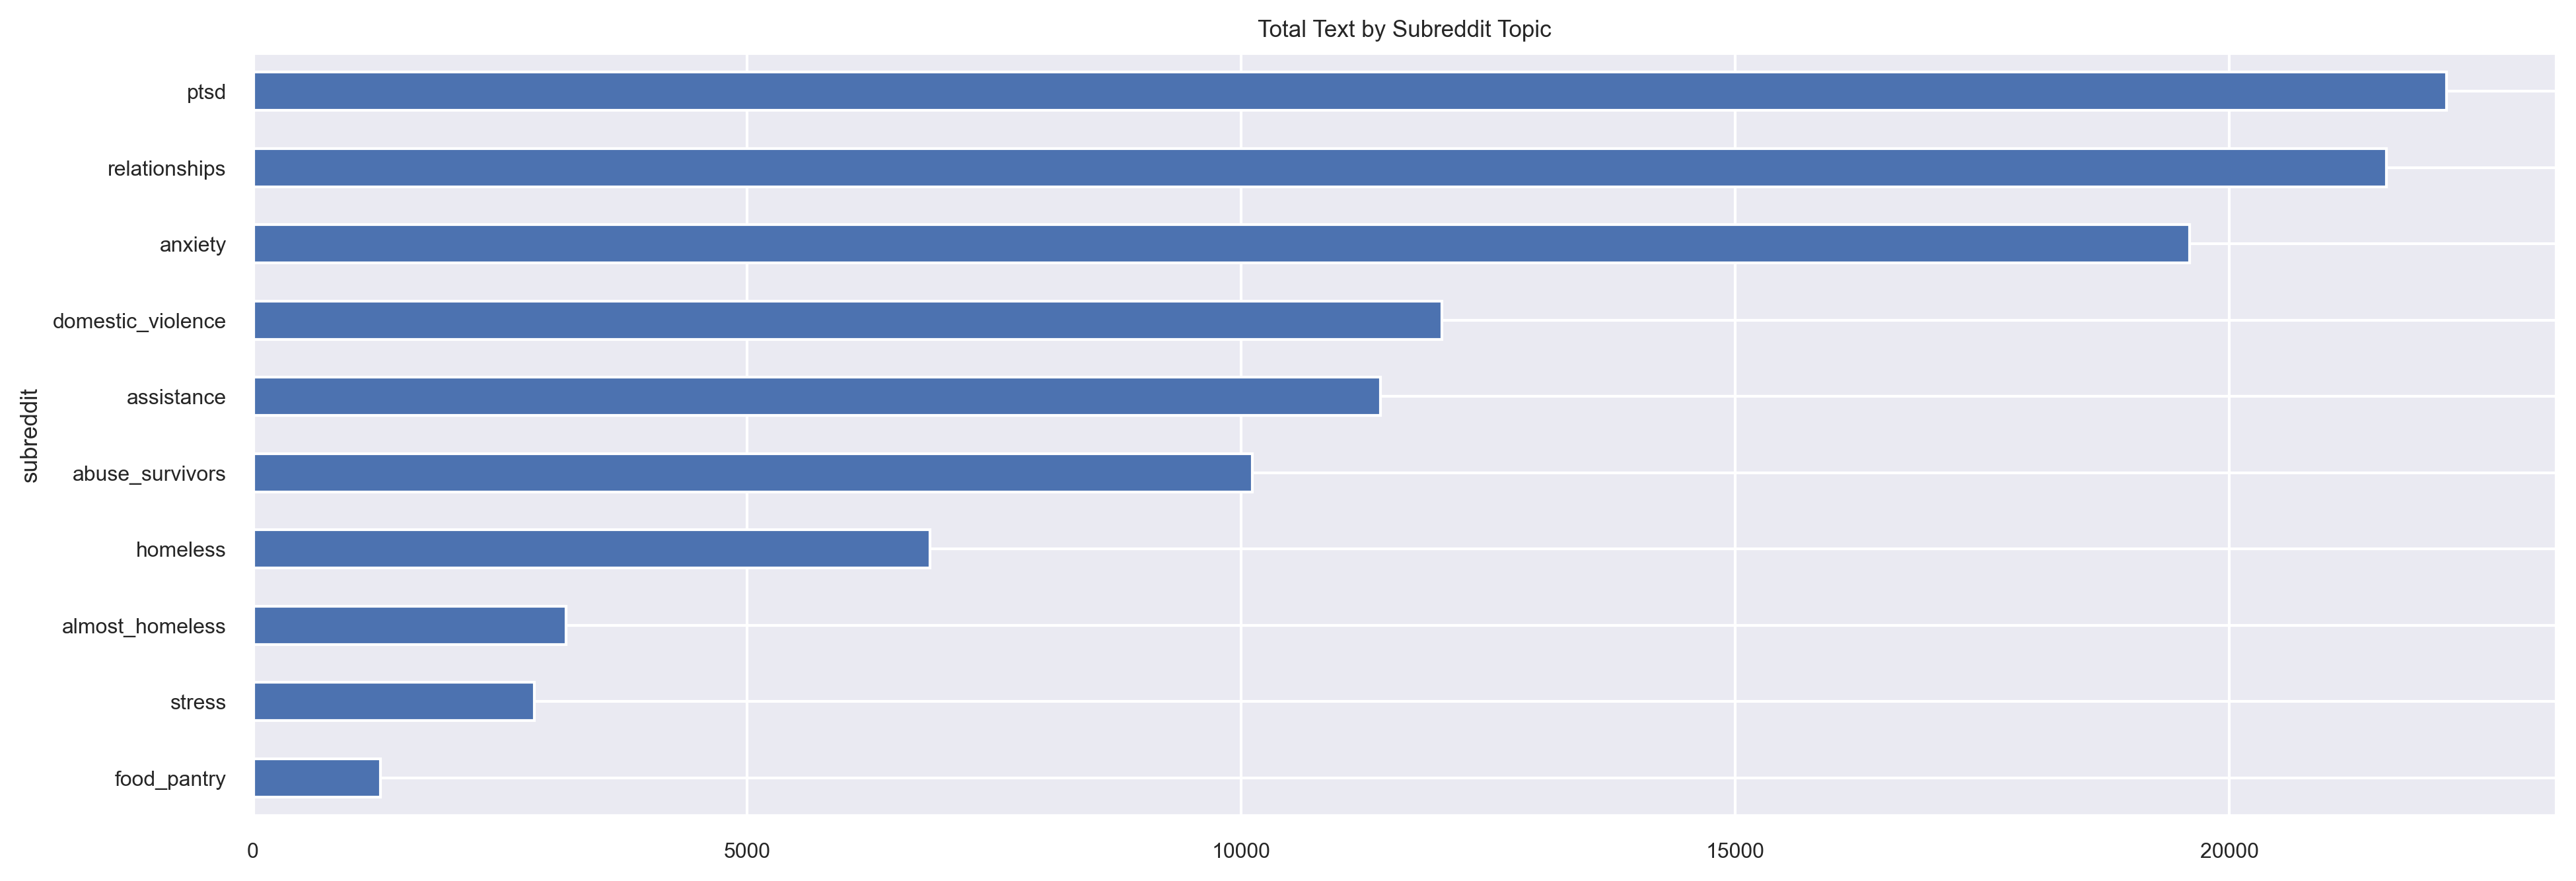

In [100]:
# visualizing total word count by subreddit topic
# let's also use the total text length as a benchmark/reference

plt.figure(figsize = (15, 5))
sum_of_words.sort_values(ascending = True).plot.barh()

plt.title("Total Text by Subreddit Topic")
plt.show()

In [101]:
'all_freq',
'almost_homeless_freq',
'assistance_freq',
'axiety_freq',
'domestic_violence_freq',
'food_pantry_freq',
'homeless_freq',
'ptsd_freq',
'relationships_freq',
'stress_freq',
'survivors_freq'

'survivors_freq'

In [102]:
# what about identifying unique subreddit words or topics used by subreddit?
# start by concatinating all subreddit series

subreddit_counts = (
            # combining all subreddit series as one mass df with ea. word representing a unique record and ea. value representing a total use count by subreddit topic
            # i am also sorting the records by 
            pd.concat(
                [all_freq,
                almost_homeless_freq,
                assistance_freq,
                axiety_freq,
                domestic_violence_freq,
                food_pantry_freq,
                homeless_freq,
                ptsd_freq,
                relationships_freq,
                stress_freq,
                survivors_freq], 
                axis = 1, 
                sort = True) \
                    # renaming the columns to their appropriate subreddit topic
                    .set_axis(
                        ['all',
                        'almost_homeless',
                        'assistance',
                        'axiety',
                        'domestic_violence',
                        'food_pantry',
                        'homeless',
                        'ptsd',
                        'relationships',
                        'stress',
                        'survivors'], 
                        axis = 1, 
                        inplace = False) \
                                # filling any missing or NULL values with zeros
                                .fillna(0) \
                                        # converting observation values to interger type data
                                        .apply(lambda s: s.astype(int)))

In [103]:
# check the new df head

subreddit_counts.head()

,all,almost_homeless,assistance,axiety,domestic_violence,food_pantry,homeless,ptsd,relationships,stress,survivors
0,4,0,1,1,0,0,0,0,0,0,2
00,3,0,0,0,2,0,0,0,1,0,0
000,6,0,3,1,0,0,1,0,1,0,0
06,1,0,0,0,0,0,0,1,0,0,0
1,63,5,11,10,1,0,2,8,20,3,3


``observations/insights``

1. I am unsure of the usefulness that 'numerical' text have in the context of stress data? For this, I will consider removing this text. I believe that on a more thorough/in-depth look at the text data by subreddit - there may be a need for a deeper dive into the potential numerical meaning/patterns.

2. I want to focus on 'text' or langugage based words that may be significant to indicators of stress or subreddit topic.

----

In [104]:
# observation/action #1
# remove all remaining numerical text in the df
# step 1, check the column data type (should be string)

train["text"].dtype # check outs!

dtype('O')

In [105]:
# step 2, preview a values sample of the 'text' column 

train['text'].sample(50, random_state = 808)

715     short live christchurch new zealand friend cur...
1350    boyfriend constantly state longer relationship...
273     bring trying pawn others would eventually brin...
1599    took sleeping pill cleaning gun magazine wa wa...
1185    three said sorry actually gave noncommittal ex...
647     able let fact let long even fact heart still c...
2434    woke 4 day later intubated paralyzed know wa l...
1642    told son want live reality matter bad old stil...
2326    posting know sub wa directed originally posted...
2391    either way cant see anyone genuinely liking mu...
1069    written letter give letter repeat wanted say l...
12      people abrasive mean stupid shit time presumpt...
534     year half ago best friend wa apart somewhat co...
2059    url one current bank statement pizza paycheck ...
31      bust stigma whine frank know someone else stru...
2351    yet job requires always reachable staff always...
360     since major voice refused speak anyone afraid ...
333     fat un

In [106]:
# step 3, use regex to remove all digit/numerical type characters in the 'text' column
# regex breakdown:
# '[0-9\s]' first, find and replace all numerical characters that follow a white space
# '{2,}' secondly, find and replace all instances of 2 or more white spaces with 1 single white space

train["text"] = train["text"].str.replace('[0-9\s]{2,}', ' ')

# this line will remove any leading and trailing white space(s) that remain after initial regex cleaning
train["text"] = train["text"].str.strip()

In [107]:
# step 4, inspect the altered values 

train['text'].sample(50, random_state = 808) # checks out

715     short live christchurch new zealand friend cur...
1350    boyfriend constantly state longer relationship...
273     bring trying pawn others would eventually brin...
1599    took sleeping pill cleaning gun magazine wa wa...
1185    three said sorry actually gave noncommittal ex...
647     able let fact let long even fact heart still c...
2434    woke day later intubated paralyzed know wa loc...
1642    told son want live reality matter bad old stil...
2326    posting know sub wa directed originally posted...
2391    either way cant see anyone genuinely liking mu...
1069    written letter give letter repeat wanted say l...
12      people abrasive mean stupid shit time presumpt...
534     year half ago best friend wa apart somewhat co...
2059    url one current bank statement pizza paycheck ...
31      bust stigma whine frank know someone else stru...
2351    yet job requires always reachable staff always...
360     since major voice refused speak anyone afraid ...
333     fat un

In [108]:
# work on visualizing/building wordclouds "n-grams" by subreddit topic (eg., single words, bi, tri-gram, etc.)
# before doing so, I will need to re-create sub-dataframes using the two predicted outcomes:
# stressful message = 1 / True
# non-stressful message = 0 / False

# re-splitting the text by determined outcomes

all_text = ' '.join(train.text).split()

stressful_text = ' '.join(train.text[train["label"] == 1]).split()

nostress_text = ' '.join(train.text[train["label"] == 0]).split()

In [109]:
# inspect the lists

stressful_text[0:25] # checks out

['suffered',
 'mild',
 'diagnosed',
 'year',
 'logical',
 'rational',
 'fault',
 'generally',
 'supportive',
 'cannot',
 'understand',
 'feel',
 'act',
 'suffering',
 'particularly',
 'bad',
 'matter',
 'try',
 'explain',
 'tell',
 'literally',
 'cannot',
 'help',
 'magically',
 'lift']

In [110]:
# inspect the lists

nostress_text[0:25] # checks out

['thing',
 'enjoy',
 'see',
 'big',
 'deal',
 'seems',
 'perceive',
 'grand',
 'gesture',
 'regularly',
 'say',
 'deserve',
 'someone',
 'perfect',
 'yes',
 'doe',
 'amazing',
 'also',
 'even',
 'great',
 'moderately',
 'thoughtful',
 'ha',
 'also',
 'said']

In [111]:
# viewing the word frequency count of ea. outcome

stress_freq = pd.Series(stressful_text).value_counts()
nostress_freq = pd.Series(nostress_text).value_counts()
all_freq = pd.Series(all_text).value_counts()

stress_freq.head(20)

wa        706
like      404
know      350
feel      321
get       303
time      299
even      240
ha        232
really    220
day       210
want      206
thing     191
help      187
year      186
would     184
one       174
back      160
friend    159
going     149
think     141
dtype: int64

In [ ]:
#